In [1]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.stats.diagnostic as diag
import scipy.stats as sc
from matplotlib import pyplot
import statsmodels.formula.api as smf

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 200em; }</style>"))

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
#Read Weekly Song Stream Data from last 6 months: 2022.07.14 to 2023.01.05
data1_import=pd.read_csv('regional-tr-weekly-2022-07-14.csv')
data2_import=pd.read_csv('regional-tr-weekly-2022-07-21.csv')
data3_import=pd.read_csv('regional-tr-weekly-2022-07-28.csv')
data4_import=pd.read_csv('regional-tr-weekly-2022-08-04.csv')
data5_import=pd.read_csv('regional-tr-weekly-2022-08-11.csv')
data6_import=pd.read_csv('regional-tr-weekly-2022-08-18.csv')
data7_import=pd.read_csv('regional-tr-weekly-2022-08-25.csv')
data8_import=pd.read_csv('regional-tr-weekly-2022-09-01.csv')
data9_import=pd.read_csv('regional-tr-weekly-2022-09-08.csv')
data10_import=pd.read_csv('regional-tr-weekly-2022-09-15.csv')
data11_import=pd.read_csv('regional-tr-weekly-2022-09-22.csv')
data12_import=pd.read_csv('regional-tr-weekly-2022-09-29.csv')
data13_import=pd.read_csv('regional-tr-weekly-2022-10-06.csv')
data14_import=pd.read_csv('regional-tr-weekly-2022-10-13.csv')
data15_import=pd.read_csv('regional-tr-weekly-2022-10-20.csv')
data16_import=pd.read_csv('regional-tr-weekly-2022-10-27.csv')
data17_import=pd.read_csv('regional-tr-weekly-2022-11-03.csv')
data18_import=pd.read_csv('regional-tr-weekly-2022-11-10.csv')
data19_import=pd.read_csv('regional-tr-weekly-2022-11-17.csv')
data20_import=pd.read_csv('regional-tr-weekly-2022-11-24.csv')
data21_import=pd.read_csv('regional-tr-weekly-2022-12-01.csv')
data22_import=pd.read_csv('regional-tr-weekly-2022-12-08.csv')
data23_import=pd.read_csv('regional-tr-weekly-2022-12-15.csv')
data24_import=pd.read_csv('regional-tr-weekly-2022-12-22.csv')
data25_import=pd.read_csv('regional-tr-weekly-2022-12-29.csv')
data26_import=pd.read_csv('regional-tr-weekly-2023-01-05.csv')

In [5]:
data1_import.insert(9, column = "Week", value = pd.to_datetime("2022-07-14"))
data2_import.insert(9, column = "Week", value = pd.to_datetime("2022-07-21"))
data3_import.insert(9, column = "Week", value = pd.to_datetime("2022-07-28"))
data4_import.insert(9, column = "Week", value = pd.to_datetime("2022-08-04"))
data5_import.insert(9, column = "Week", value = pd.to_datetime("2022-08-11"))
data6_import.insert(9, column = "Week", value = pd.to_datetime("2022-08-18"))
data7_import.insert(9, column = "Week", value = pd.to_datetime("2022-08-25"))
data8_import.insert(9, column = "Week", value = pd.to_datetime("2022-09-01"))
data9_import.insert(9, column = "Week", value = pd.to_datetime("2022-09-08"))
data10_import.insert(9, column = "Week", value = pd.to_datetime("2022-09-15"))
data11_import.insert(9, column = "Week", value = pd.to_datetime("2022-09-22"))
data12_import.insert(9, column = "Week", value = pd.to_datetime("2022-09-29"))
data13_import.insert(9, column = "Week", value = pd.to_datetime("2022-10-06"))
data14_import.insert(9, column = "Week", value = pd.to_datetime("2022-10-13"))
data15_import.insert(9, column = "Week", value = pd.to_datetime("2022-10-20"))
data16_import.insert(9, column = "Week", value = pd.to_datetime("2022-10-27"))
data17_import.insert(9, column = "Week", value = pd.to_datetime("2022-11-03"))
data18_import.insert(9, column = "Week", value = pd.to_datetime("2022-11-10"))
data19_import.insert(9, column = "Week", value = pd.to_datetime("2022-11-17"))
data20_import.insert(9, column = "Week", value = pd.to_datetime("2022-11-24"))
data21_import.insert(9, column = "Week", value = pd.to_datetime("2022-12-01"))
data22_import.insert(9, column = "Week", value = pd.to_datetime("2022-12-08"))
data23_import.insert(9, column = "Week", value = pd.to_datetime("2022-12-15"))
data24_import.insert(9, column = "Week", value = pd.to_datetime("2022-12-22"))
data25_import.insert(9, column = "Week", value = pd.to_datetime("2022-12-29"))
data26_import.insert(9, column = "Week", value = pd.to_datetime("2023-01-05"))

In [6]:
data1_import.head()

rank                                   uri     artist_names  \
0     1  spotify:track:7toL7Re9rApzIuIFDaLQSe             KÖFN   
1     2  spotify:track:5UueGx6aALmUslrPdWOB9K  BEGE, Yung Ouzo   
2     3  spotify:track:38QSynLcDBfbETORhSsssH              ATE   
3     4  spotify:track:65tIJClJx8fHo6YW4wVDhi            Güneş   
4     5  spotify:track:3iz0BamLeB8AngNYpjbC6E       Sefo, Capo   

            track_name                source  peak_rank  previous_rank  \
0  Bi' Tek Ben Anlarım                Hypers          1              3   
1                2T1BB                  BEGE          1              1   
2          Diğer Yarım                   ATE          3             -1   
3     Suçlarımdan Biri  M.O.B. Entertainment          1              2   
4             ISABELLE               3TR6AP2          4              4   

   weeks_on_chart  streams       Week  
0              17  3096763 2022-07-14  
1               3  2958383 2022-07-14  
2               1  2925556 2022-07-14  
3              16  2907718 2022-07-14  
4               5  2820865 2022-07-14

In [7]:
# list of dataframes
dfs = [data1_import, data2_import,data3_import,data4_import,data5_import,data6_import,data7_import,data8_import,
data9_import,data10_import,data11_import,data12_import,data13_import,data14_import,data15_import,data16_import,
data17_import,data18_import,data19_import,data20_import,data21_import,data22_import,data23_import,data24_import,data25_import,data26_import] 

In [8]:
from functools import reduce

df_final=reduce(lambda x,y: pd.merge(x,y, how='outer'), dfs)

In [9]:
df_final.head()

rank                                   uri     artist_names  \
0     1  spotify:track:7toL7Re9rApzIuIFDaLQSe             KÖFN   
1     2  spotify:track:5UueGx6aALmUslrPdWOB9K  BEGE, Yung Ouzo   
2     3  spotify:track:38QSynLcDBfbETORhSsssH              ATE   
3     4  spotify:track:65tIJClJx8fHo6YW4wVDhi            Güneş   
4     5  spotify:track:3iz0BamLeB8AngNYpjbC6E       Sefo, Capo   

            track_name                source  peak_rank  previous_rank  \
0  Bi' Tek Ben Anlarım                Hypers          1              3   
1                2T1BB                  BEGE          1              1   
2          Diğer Yarım                   ATE          3             -1   
3     Suçlarımdan Biri  M.O.B. Entertainment          1              2   
4             ISABELLE               3TR6AP2          4              4   

   weeks_on_chart  streams       Week  
0              17  3096763 2022-07-14  
1               3  2958383 2022-07-14  
2               1  2925556 2022-07-14  
3              16  2907718 2022-07-14  
4               5  2820865 2022-07-14

In [10]:
df_songs = pd.read_excel('SongStreamForecast_Trend.xlsx')
df_songs.head()

uri                 artist_names  \
0  spotify:track:4OH5Cd8ZOI1eSgJSC9PYmU      Mert Demir, Mabel Matiz   
1  spotify:track:7toL7Re9rApzIuIFDaLQSe                         KÖFN   
2  spotify:track:3QopdONAzZHRO1P4UQrNvw                  Mabel Matiz   
3  spotify:track:5ATwkalJ9FnLp7Zcvxo1rl  Dedublüman, Mavzer Tabancas   
4  spotify:track:1MbZ6YY51arGV7mqeAb0y4                       Motive   

            track_name  Forecasted Total Streams for 6-12 Jan 2023 Trend  \
0         Antidepresan                                         NaN     x   
1  Bi' Tek Ben Anlarım                                         NaN   NaN   
2         Fırtınadayım                                         NaN     x   
3                Belki                                         NaN     x   
4                 10MG                                         NaN     x   

  No Trend  Unnamed: 6  
0      NaN         NaN  
1        x         NaN  
2      NaN         NaN  
3      NaN         NaN  
4      NaN         NaN

In [11]:
df_songs['track_name'] = df_songs['track_name'].replace([25.0], '25')

In [12]:
df_songs['track_name'].unique()

array(['Antidepresan', "Bi' Tek Ben Anlarım", 'Fırtınadayım', 'Belki',
       '10MG', 'SENIN UGRUNA', 'Unutmak Öyle Kolay Mı Sandın', 'NKBİ',
       'Ölümle Yaşam Arasında', 'Olur Mu', 'Gökyüzünü Tutamam',
       'Aşkın Olayım', 'Kor', 'Altüst Olmuşum', 'Diğer Yarım',
       'Belki - Akustik', 'Yalanı Bırak', 'Suçlarımdan Biri',
       'Seni Dert Etmeler', '25', 'Nerdesin', 'Ara', 'ZOR', 'Dip',
       'Bir Derdim Var', 'VUR', 'Masal Gibi', 'ARASAN DA',
       'Ağlaya Ağlaya', 'Sakladığın Bir Şeyler Var', 'Gitme Bebé',
       'Hep De Yorgun', 'kördüğüm', 'Another Love', 'Olmazlara İnat',
       'Mockingbird', 'Gitme', 'deniyorum, ama', 'XXL',
       'Aşk Şarkısı - Live', 'Ah Canım Sevgilim - Demo', 'Herkes Gibisin',
       'GELMEZSEN GELME', 'Sevmiş Gibi',
       "Creepin' (with The Weeknd & 21 Savage)", 'Geriye Dönemem',
       "Dinle Beni Bi'", 'UNUTTUM', 'Kalbin bana kaldı', 'Dayanamam',
       'Bu Saatten Sonra', 'Mahşer', 'Cesaretsizce Olmuyor',
       'Yarım Kalan Sigara', 'Yara',

In [13]:
rng=list(range(0,1))
df_songs['Song ID']=np.arange(len(df_songs.iloc[:,rng]))+1
df_songs.head()

uri                 artist_names  \
0  spotify:track:4OH5Cd8ZOI1eSgJSC9PYmU      Mert Demir, Mabel Matiz   
1  spotify:track:7toL7Re9rApzIuIFDaLQSe                         KÖFN   
2  spotify:track:3QopdONAzZHRO1P4UQrNvw                  Mabel Matiz   
3  spotify:track:5ATwkalJ9FnLp7Zcvxo1rl  Dedublüman, Mavzer Tabancas   
4  spotify:track:1MbZ6YY51arGV7mqeAb0y4                       Motive   

            track_name  Forecasted Total Streams for 6-12 Jan 2023 Trend  \
0         Antidepresan                                         NaN     x   
1  Bi' Tek Ben Anlarım                                         NaN   NaN   
2         Fırtınadayım                                         NaN     x   
3                Belki                                         NaN     x   
4                 10MG                                         NaN     x   

  No Trend  Unnamed: 6  Song ID  
0      NaN         NaN        1  
1        x         NaN        2  
2      NaN         NaN        3  
3      NaN         NaN        4  
4      NaN         NaN        5

In [14]:
df_final=df_final.merge(df_songs, on='track_name')
df_final=df_final.drop(['rank', 'uri_x','artist_names_x','source','peak_rank','previous_rank','uri_y',
              'artist_names_y','Forecasted Total Streams for 6-12 Jan 2023','Unnamed: 6'], axis=1)
df_final.head()

track_name  weeks_on_chart  streams       Week Trend No Trend  \
0  Bi' Tek Ben Anlarım              17  3096763 2022-07-14   NaN        x   
1  Bi' Tek Ben Anlarım              18  3433534 2022-07-21   NaN        x   
2  Bi' Tek Ben Anlarım              19  3543380 2022-07-28   NaN        x   
3  Bi' Tek Ben Anlarım              20  3664487 2022-08-04   NaN        x   
4  Bi' Tek Ben Anlarım              21  3527370 2022-08-11   NaN        x   

   Song ID  
0        2  
1        2  
2        2  
3        2  
4        2

In [15]:
df_final['total_weeks'] = df_final.groupby('track_name')['weeks_on_chart'].transform('max')
df_final['total_weeks'].where(df_final['total_weeks'] <= 26, 26, inplace=True) #can not be bigger than 26 weeks
df_final.head(5)

track_name  weeks_on_chart  streams       Week Trend No Trend  \
0  Bi' Tek Ben Anlarım              17  3096763 2022-07-14   NaN        x   
1  Bi' Tek Ben Anlarım              18  3433534 2022-07-21   NaN        x   
2  Bi' Tek Ben Anlarım              19  3543380 2022-07-28   NaN        x   
3  Bi' Tek Ben Anlarım              20  3664487 2022-08-04   NaN        x   
4  Bi' Tek Ben Anlarım              21  3527370 2022-08-11   NaN        x   

   Song ID  total_weeks  
0        2           26  
1        2           26  
2        2           26  
3        2           26  
4        2           26

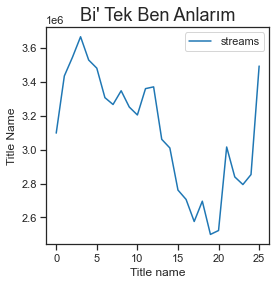

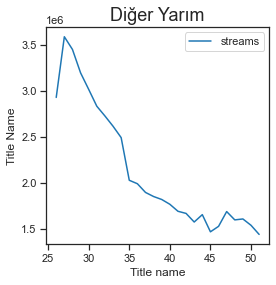

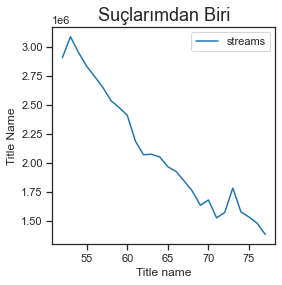

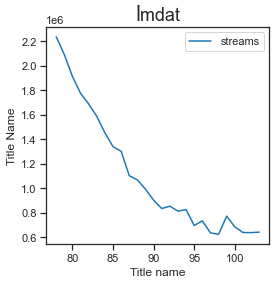

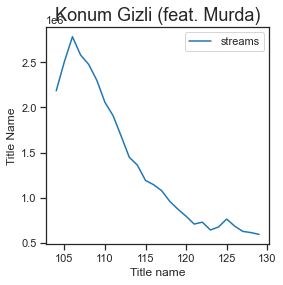

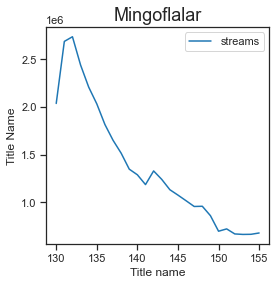

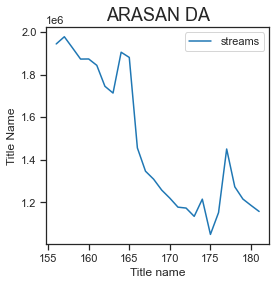

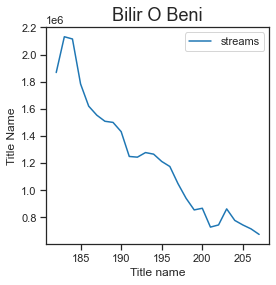

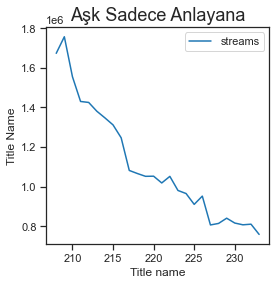

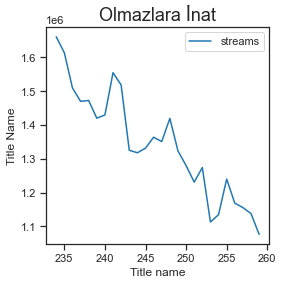

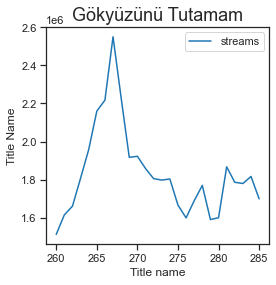

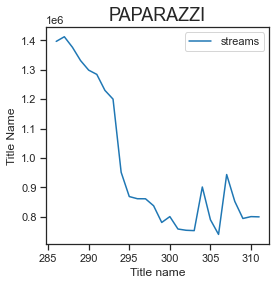

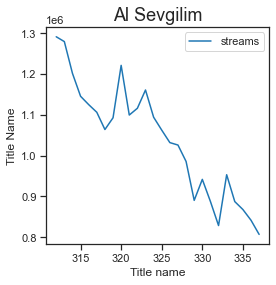

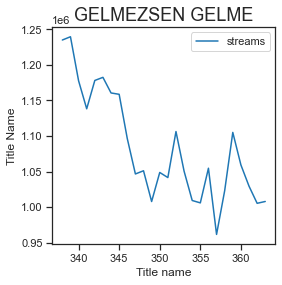

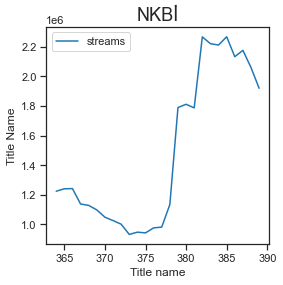

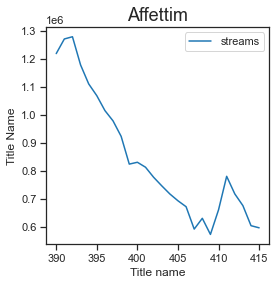

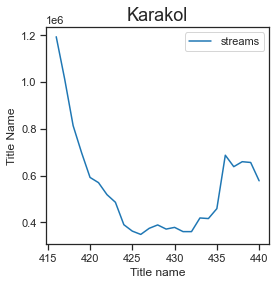

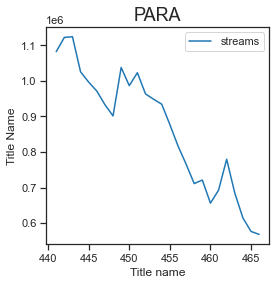

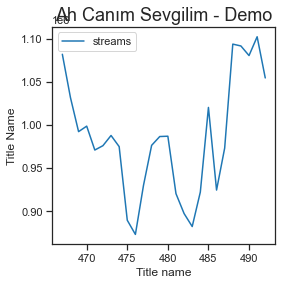

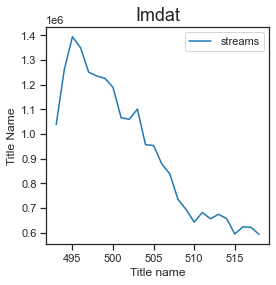

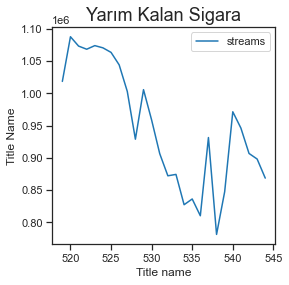

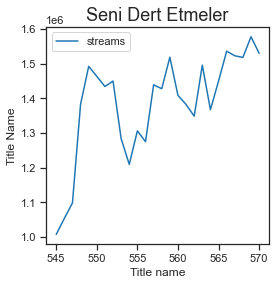

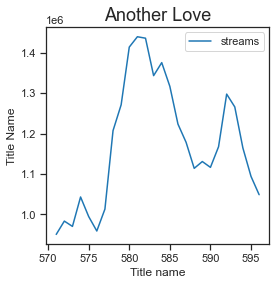

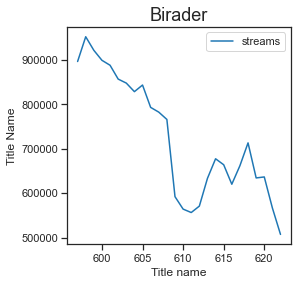

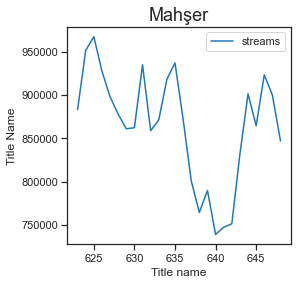

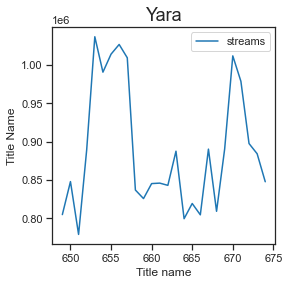

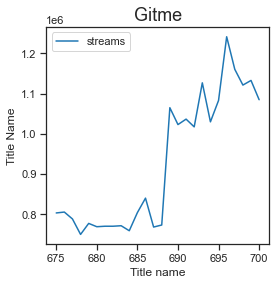

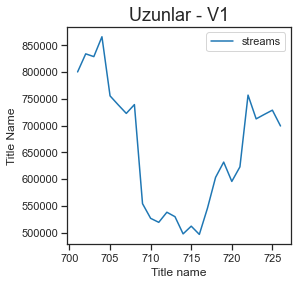

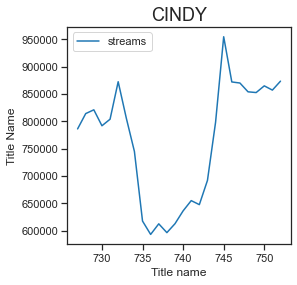

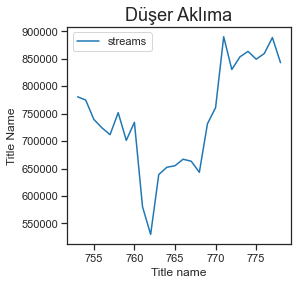

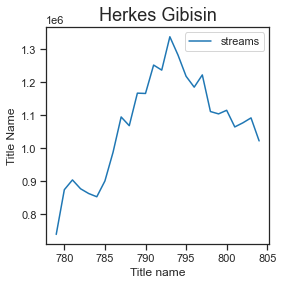

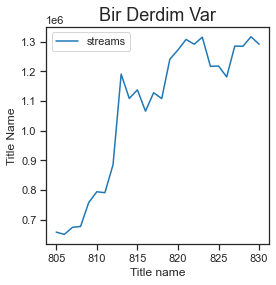

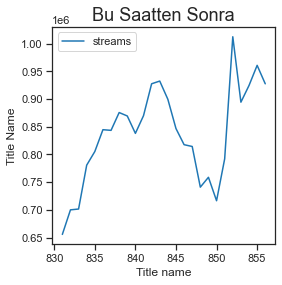

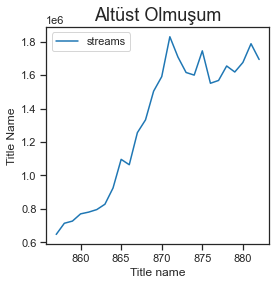

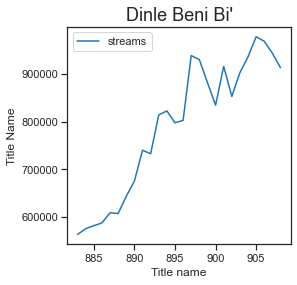

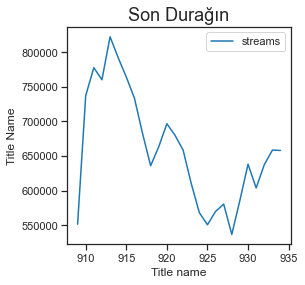

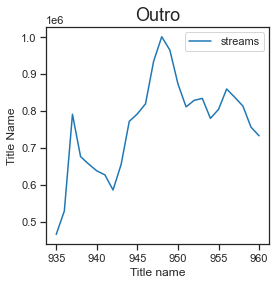

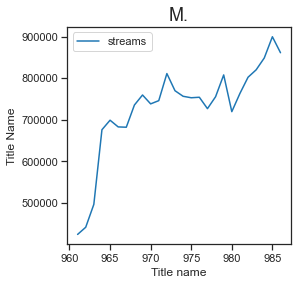

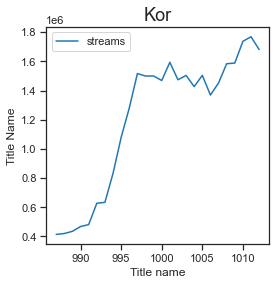

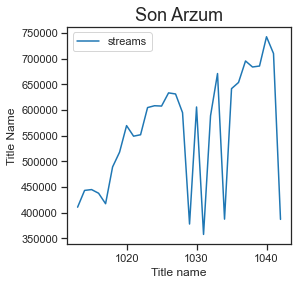

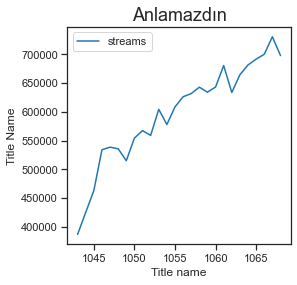

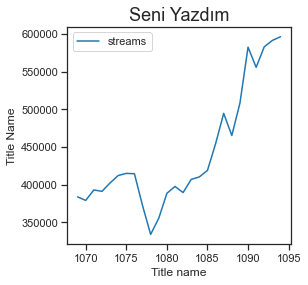

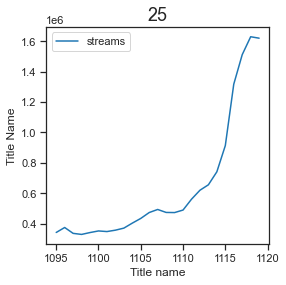

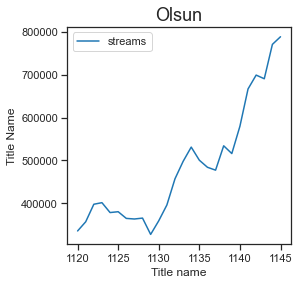

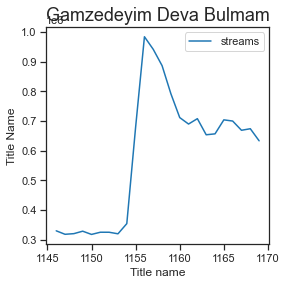

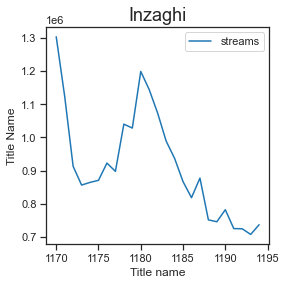

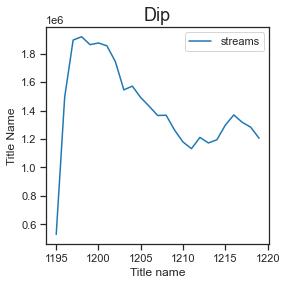

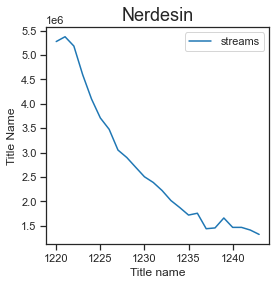

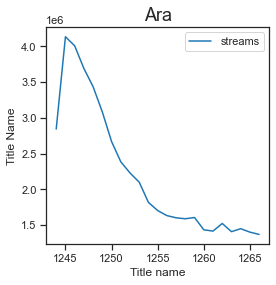

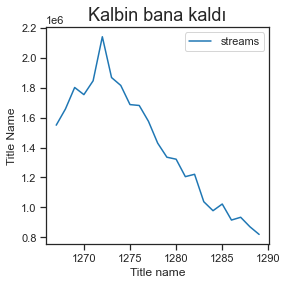

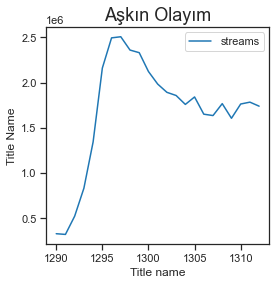

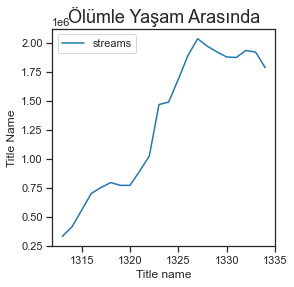

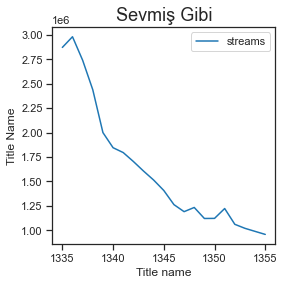

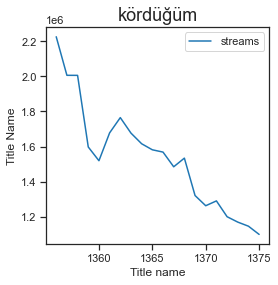

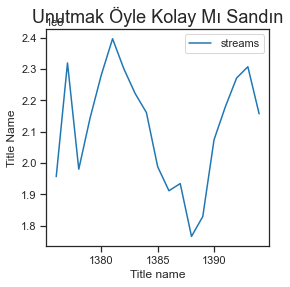

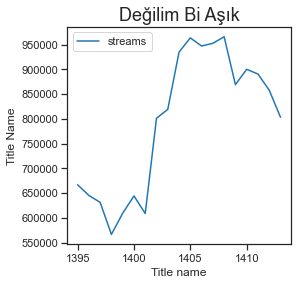

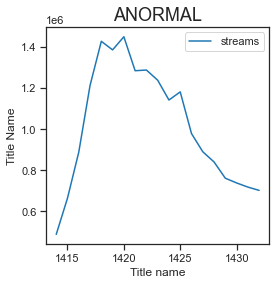

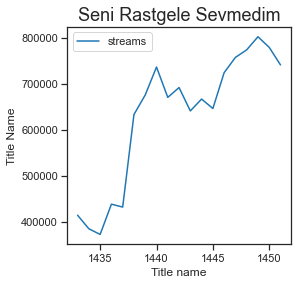

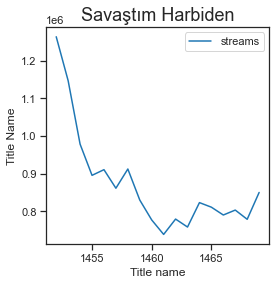

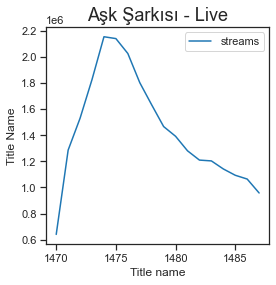

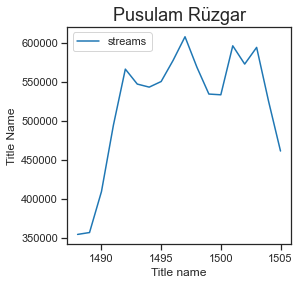

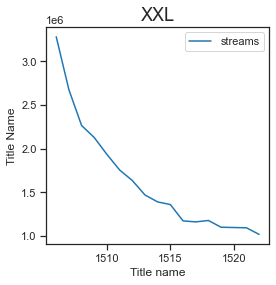

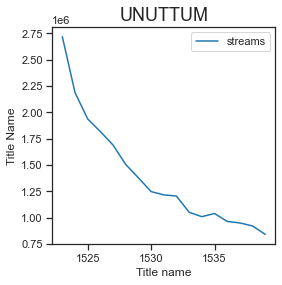

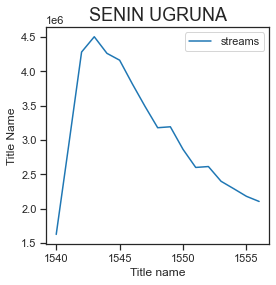

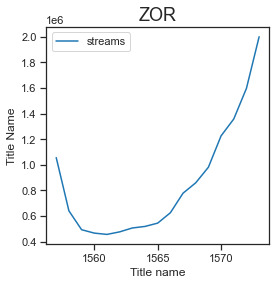

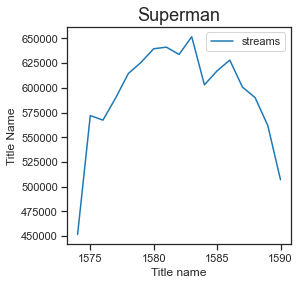

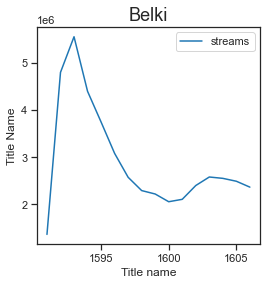

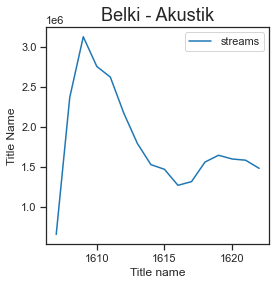

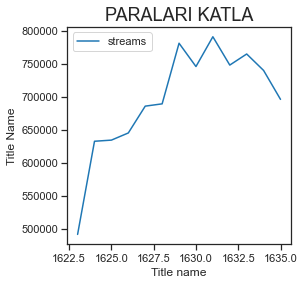

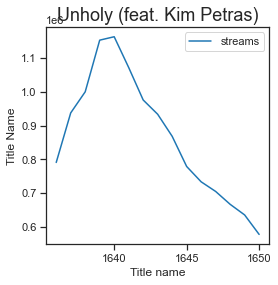

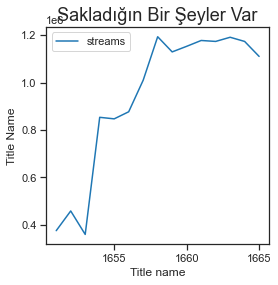

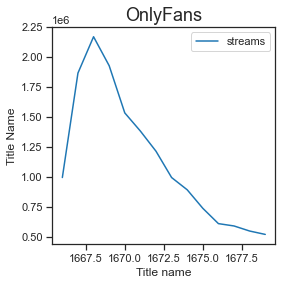

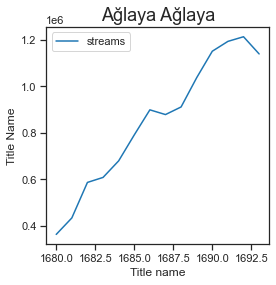

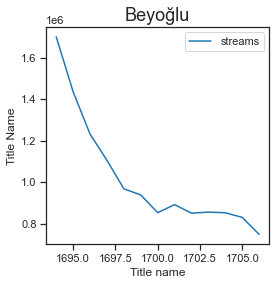

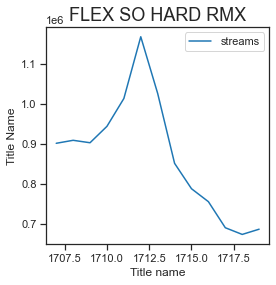

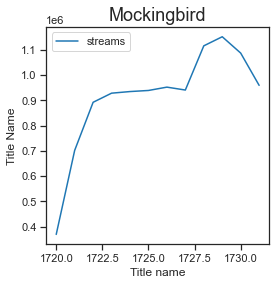

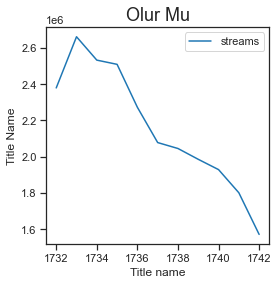

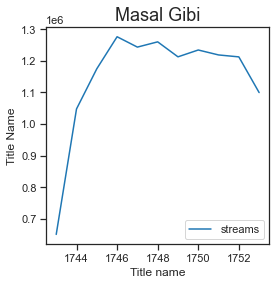

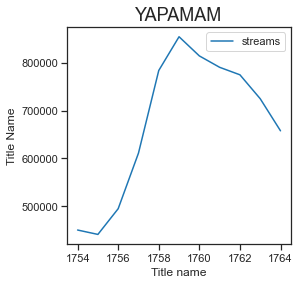

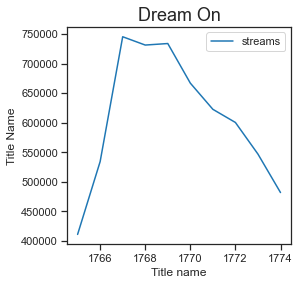

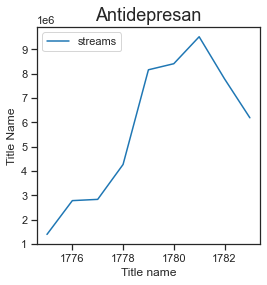

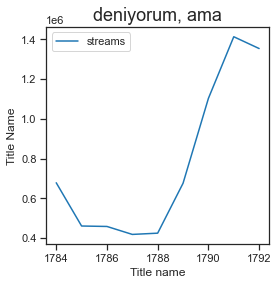

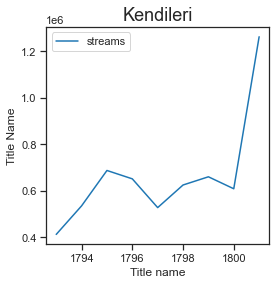

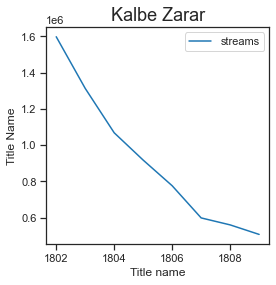

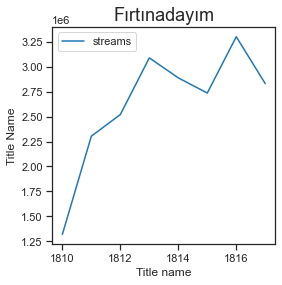

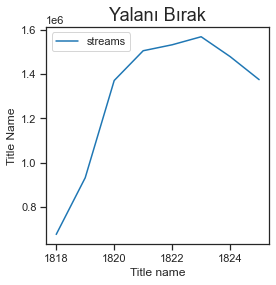

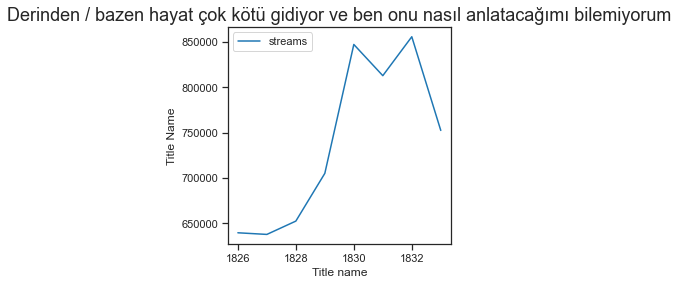

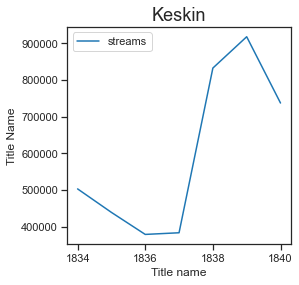

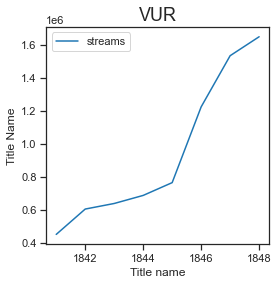

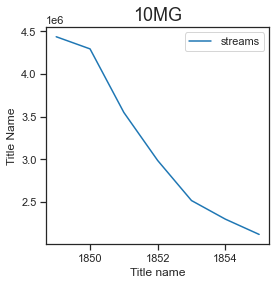

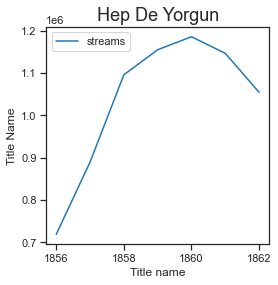

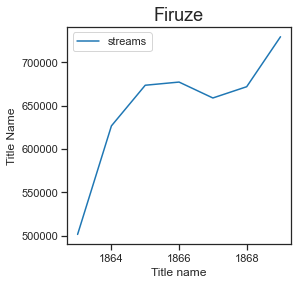

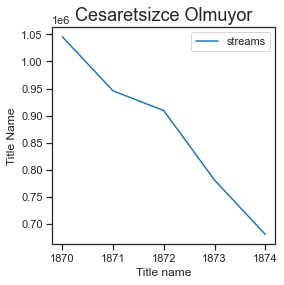

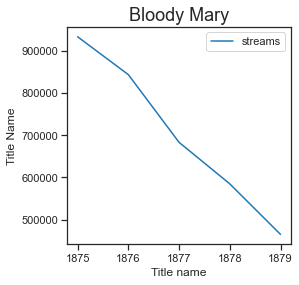

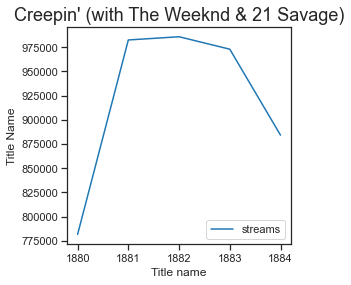

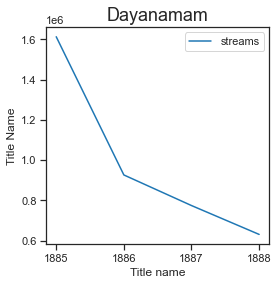

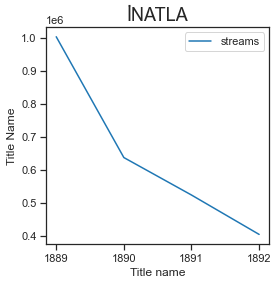

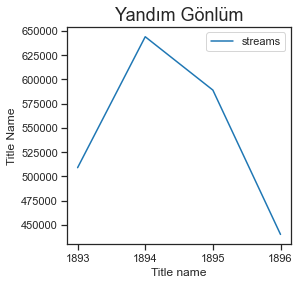

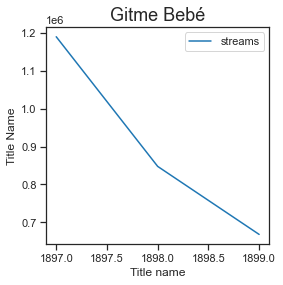

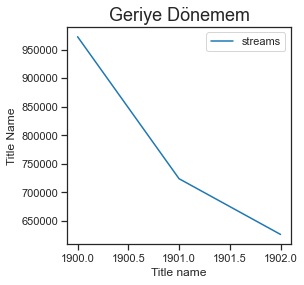

In [16]:
keys = df_songs['track_name'].unique()

df_final = df_final[df_final['track_name'].isin(keys)]

list = df_final['track_name'].unique()

for i in list:
    df_final.loc[(df_final['track_name'] == i)].plot(y=["streams"], figsize=(4,4))
    plt.title(i, fontsize=18) #Labeling titel
    plt.xlabel('Title name', fontsize=12) #Labeling x-axis 
    plt.ylabel('Title Name', fontsize=12) #Labeling y-axis 

plt.show()

In [17]:
#After this part of the project, time series forecasting models are divided into two groups
#Dynamic harmonic regression is applied for the songs with a clear trend
#Moving Average after Box-Cox transformation is applied for the songs which are more stationary 

In [18]:
df_copy = df_final
df_trend = df_final[df_final['Trend'] == 'x'] #Burası MA için 'No Trend' ile çalışacak
df_trend=df_trend.drop(['Trend','No Trend'], axis=1)
df_trend.head(5)

track_name  weeks_on_chart  streams       Week  Song ID  total_weeks
26  Diğer Yarım               1  2925556 2022-07-14       15           26
27  Diğer Yarım               2  3585198 2022-07-21       15           26
28  Diğer Yarım               3  3447156 2022-07-28       15           26
29  Diğer Yarım               4  3192990 2022-08-04       15           26
30  Diğer Yarım               5  3013297 2022-08-11       15           26

In [19]:
num = df_trend['track_name'].unique()
num

array(['Diğer Yarım', 'Suçlarımdan Biri', 'İmdat',
       'Konum Gizli (feat. Murda)', 'Mingoflalar', 'Bilir O Beni',
       'Aşk Sadece Anlayana', 'Olmazlara İnat', 'Al Sevgilim',
       'GELMEZSEN GELME', 'NKBİ', 'Affettim', 'PARA', 'Imdat', 'Birader',
       'Gitme', 'Herkes Gibisin', 'Bir Derdim Var', 'Altüst Olmuşum',
       "Dinle Beni Bi'", 'M.', 'Kor', 'Son Arzum', 'Anlamazdın',
       'Seni Yazdım', '25', 'Olsun', 'Dip', 'Nerdesin', 'Ara',
       'Kalbin bana kaldı', 'Aşkın Olayım', 'Ölümle Yaşam Arasında',
       'Sevmiş Gibi', 'kördüğüm', 'ANORMAL', 'Seni Rastgele Sevmedim',
       'Savaştım Harbiden', 'Aşk Şarkısı - Live', 'XXL', 'UNUTTUM',
       'SENIN UGRUNA', 'ZOR', 'Belki', 'Belki - Akustik',
       'PARALARI KATLA', 'Unholy (feat. Kim Petras)',
       'Sakladığın Bir Şeyler Var', 'OnlyFans', 'Ağlaya Ağlaya',
       'Beyoğlu', 'FLEX SO HARD RMX', 'Mockingbird', 'Olur Mu',
       'Masal Gibi', 'YAPAMAM', 'Dream On', 'Antidepresan',
       'deniyorum, ama', 'Kendileri', 

In [20]:
mapping_df=df_trend.drop_duplicates(subset=['track_name', 'Song ID'])
mapping_df.head(5)

track_name  weeks_on_chart  streams       Week  Song ID  \
26                 Diğer Yarım               1  2925556 2022-07-14       15   
52            Suçlarımdan Biri              16  2907718 2022-07-14       18   
78                       İmdat              13  2236439 2022-07-14       88   
104  Konum Gizli (feat. Murda)               9  2185012 2022-07-14       92   
130                Mingoflalar               2  2037068 2022-07-14       83   

     total_weeks  
26            26  
52            26  
78            26  
104           26  
130           26

In [21]:
list = df_trend['Song ID'].unique() #72
df={}

for i in list:
    df[i] = (df_trend[df_trend["Song ID"] == i])
    df[i]=df[i].loc[:, ["streams","Week","track_name","Song ID"]]
    df[i].set_index(df[i].Week,inplace=True)
    df[i]=df[i].drop('Week', axis=1)
    
    SongData = pd.DataFrame()
    SongData['Streams']=df[i]['streams']
    df[i]['Trend']=np.arange(len(SongData))+1
    df[i]['total_weeks'] = df[i].groupby('Song ID')['Trend'].transform('max')

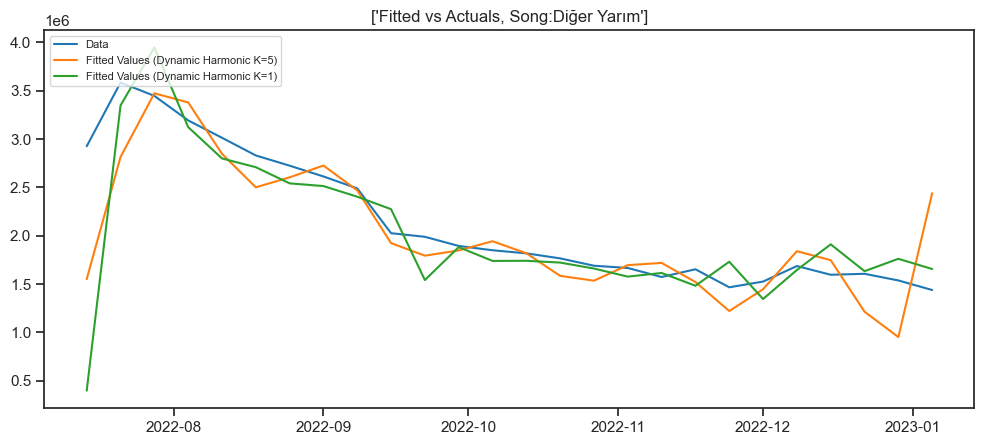

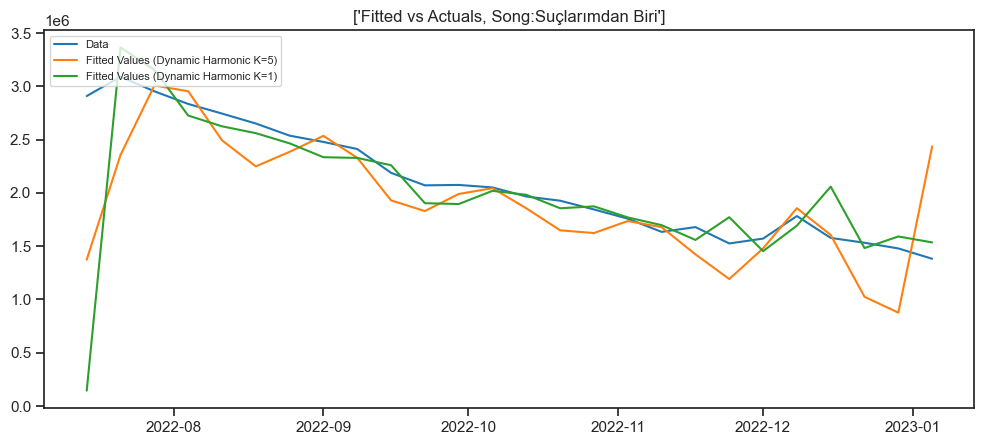

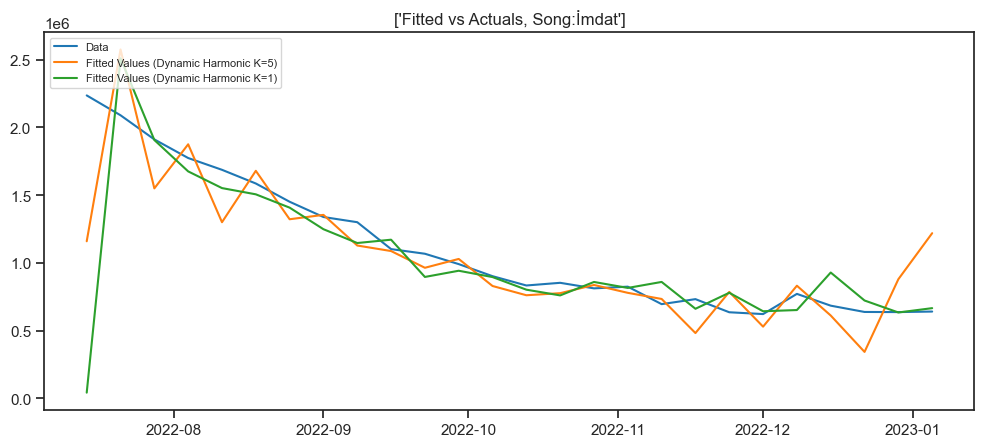

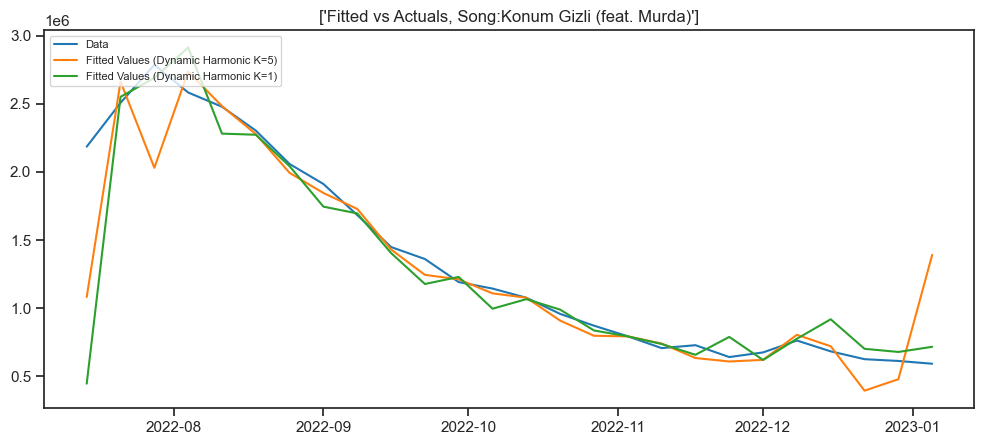

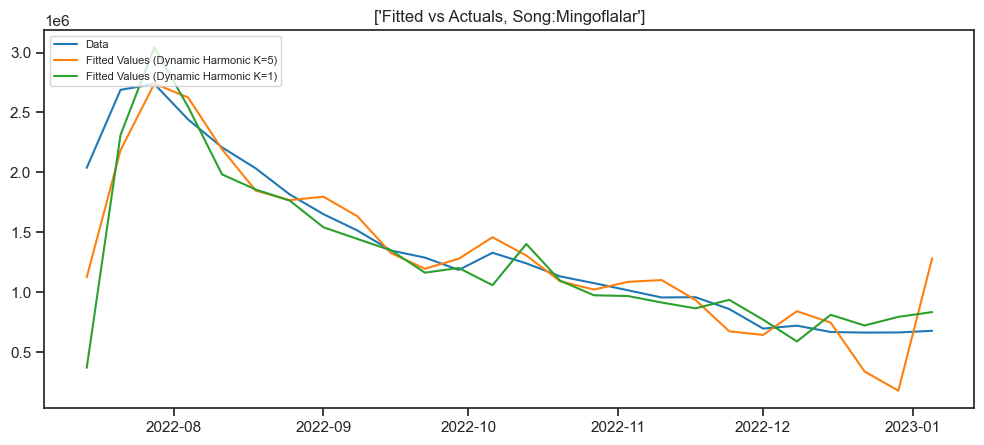

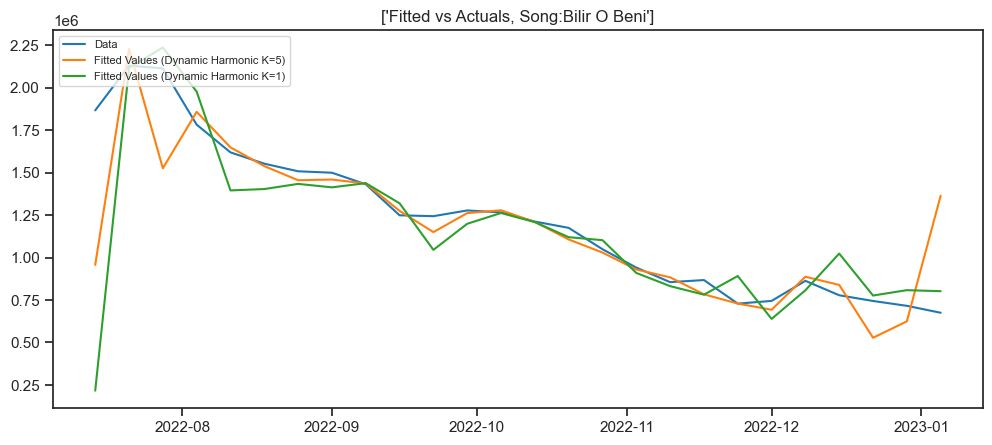

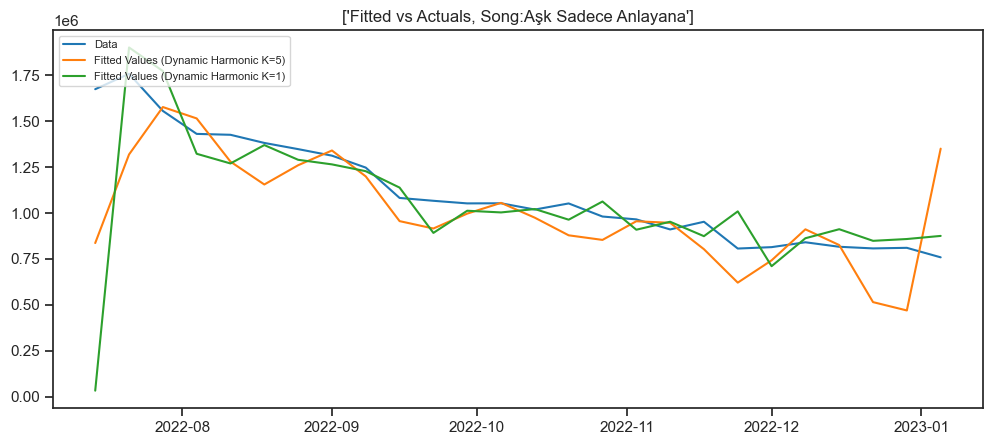

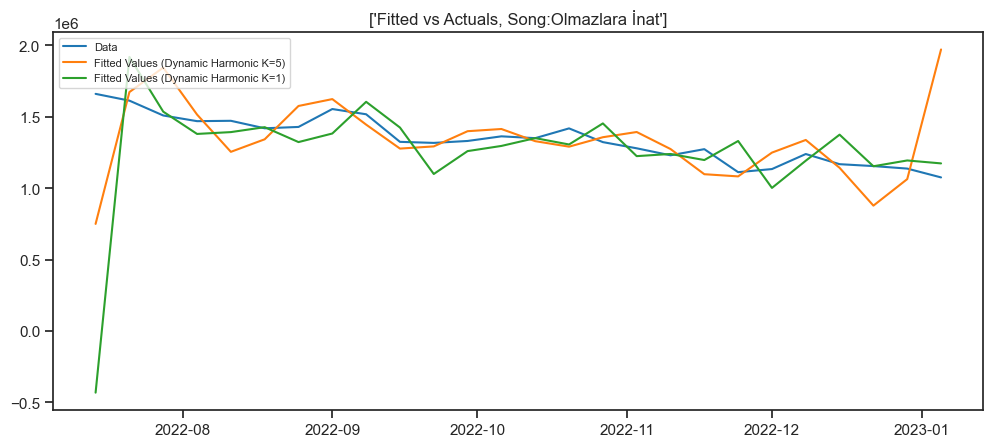

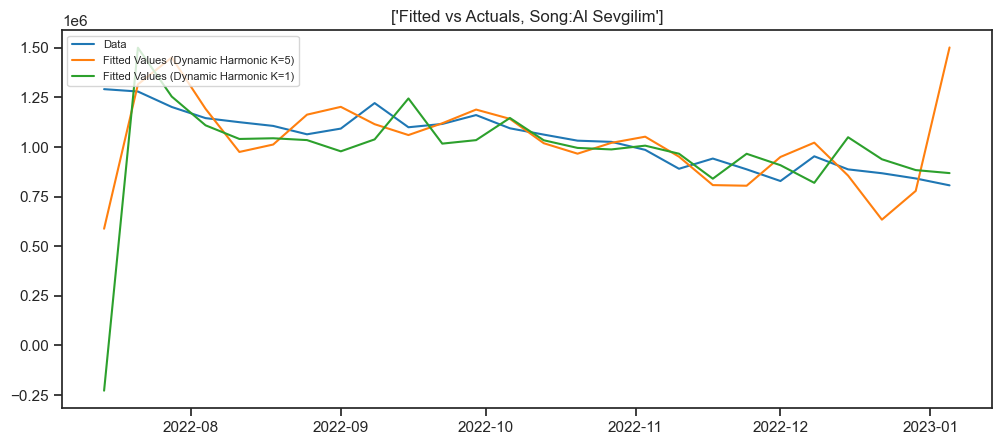

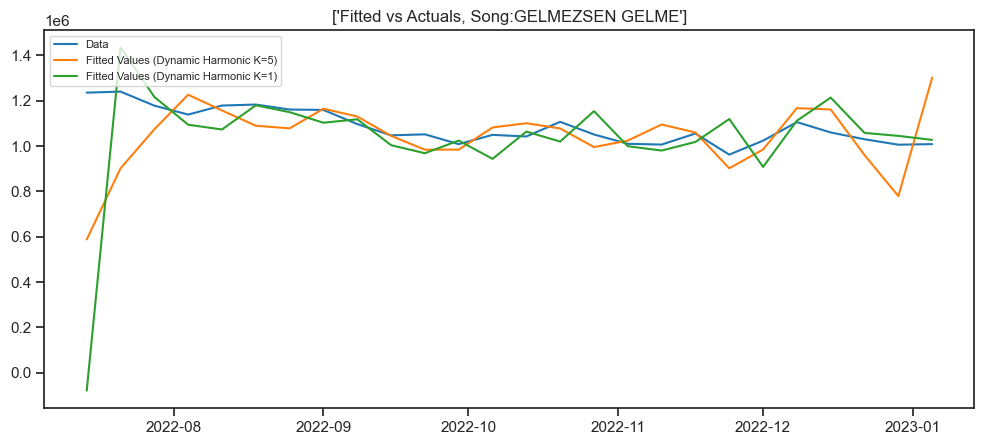

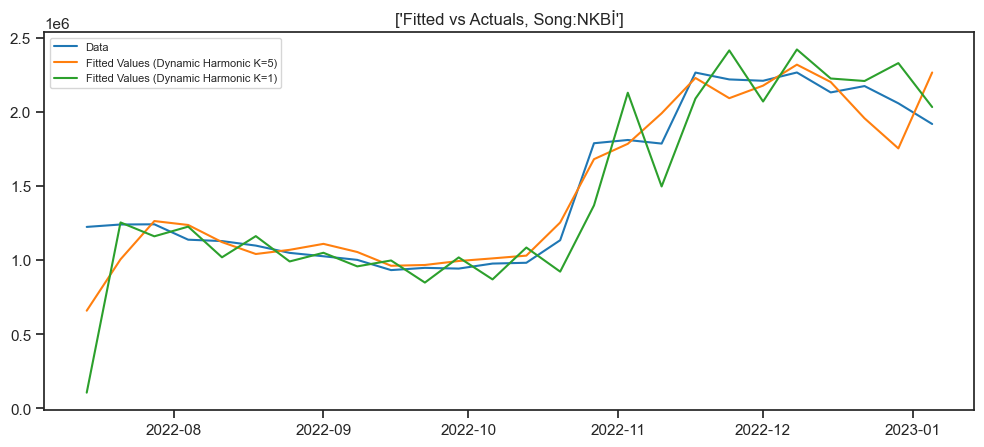

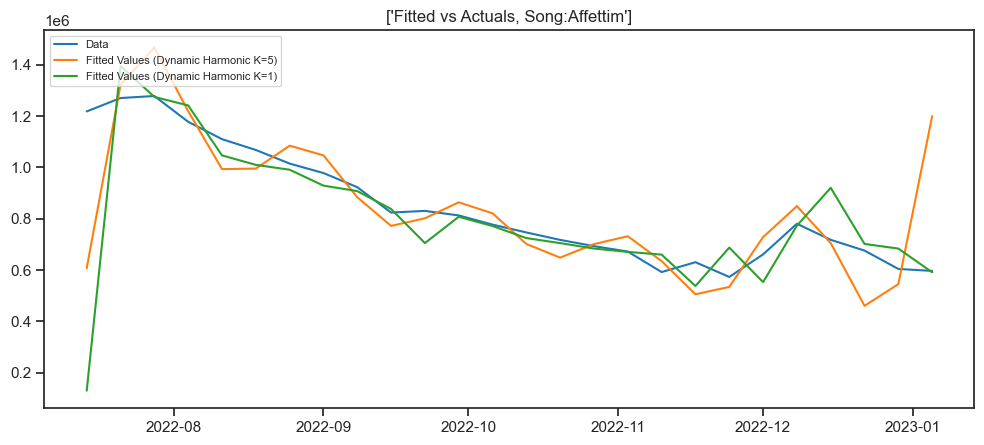

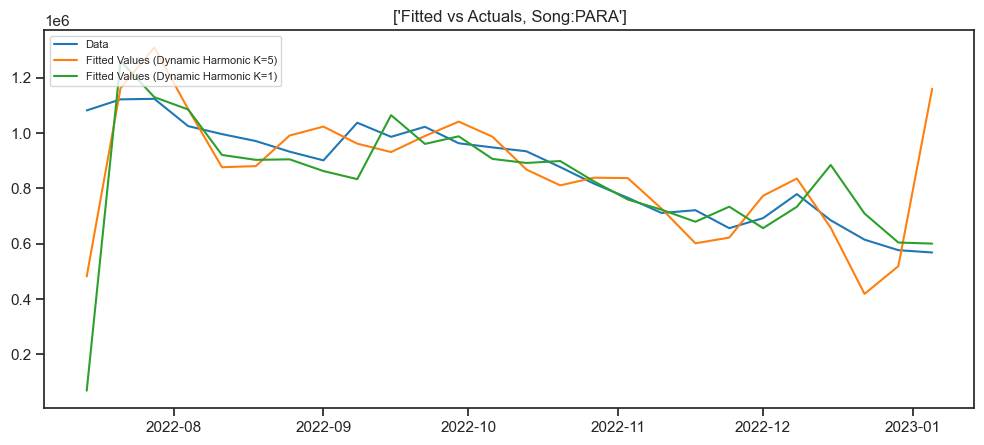

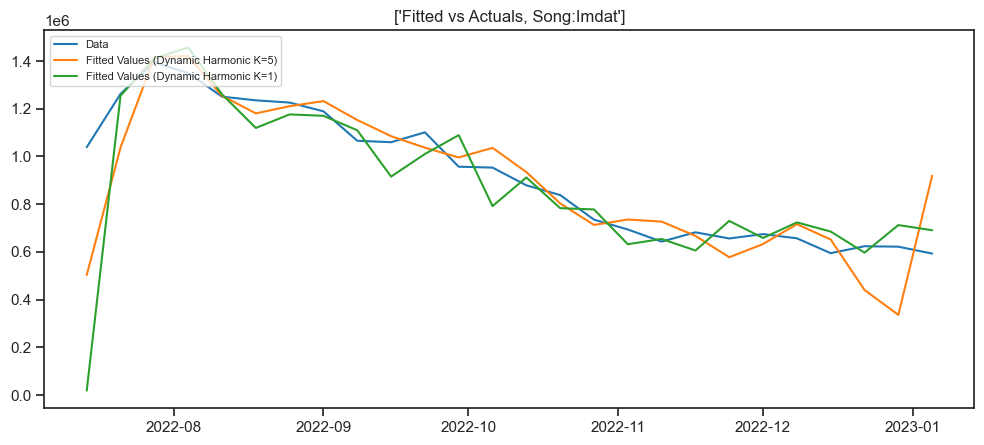

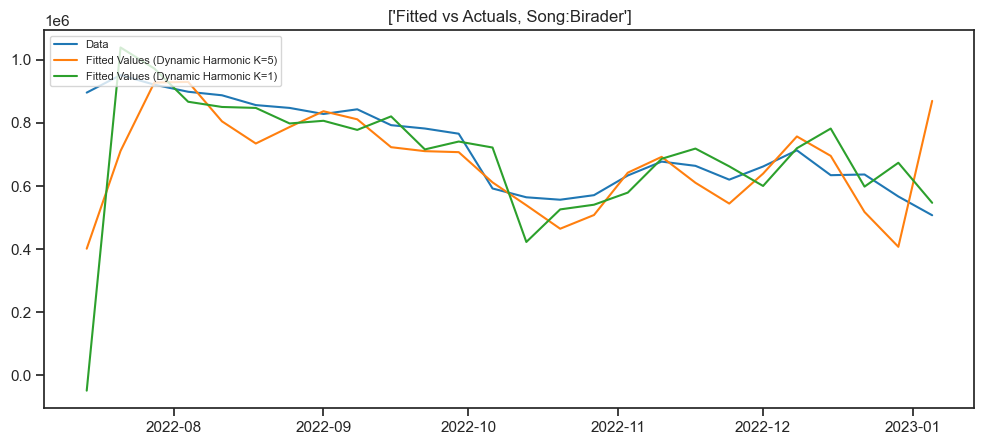

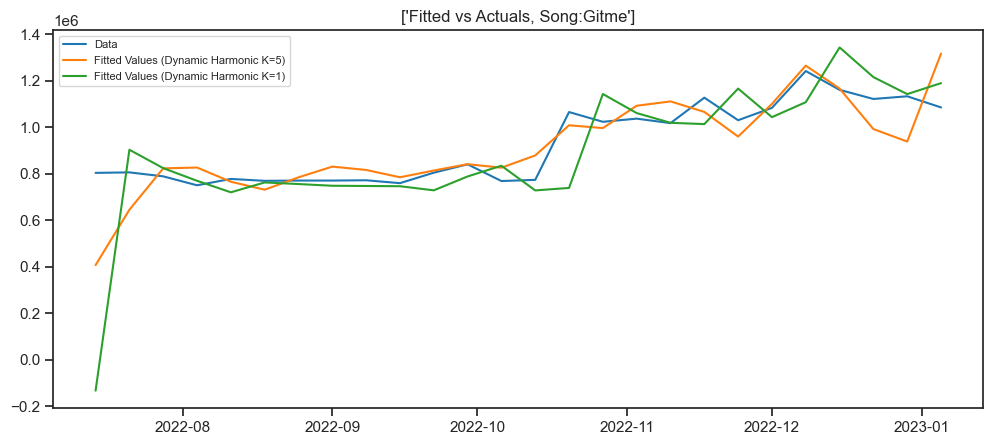

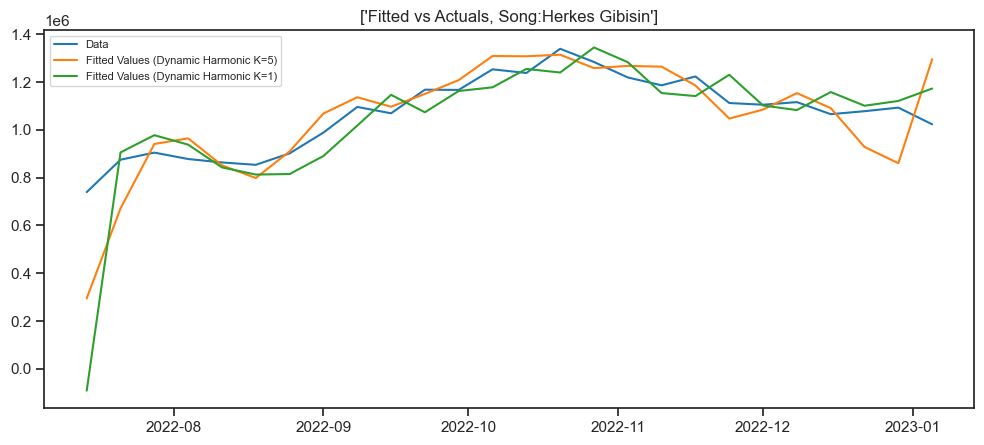

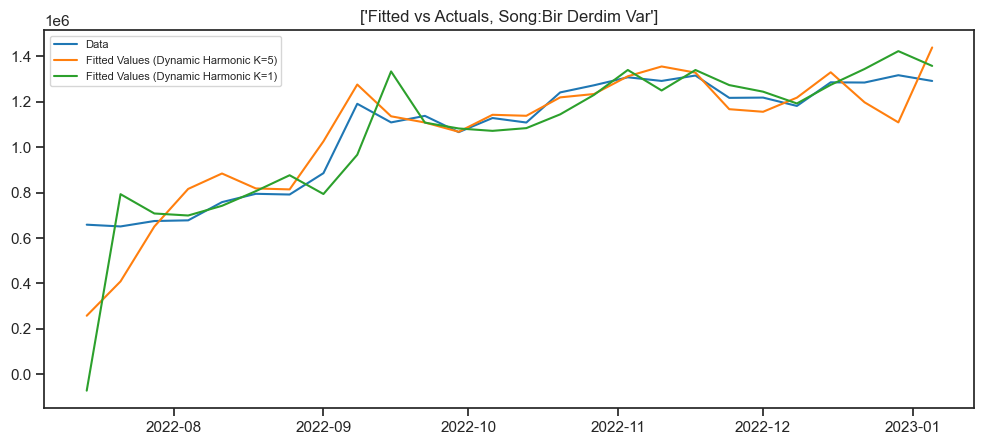

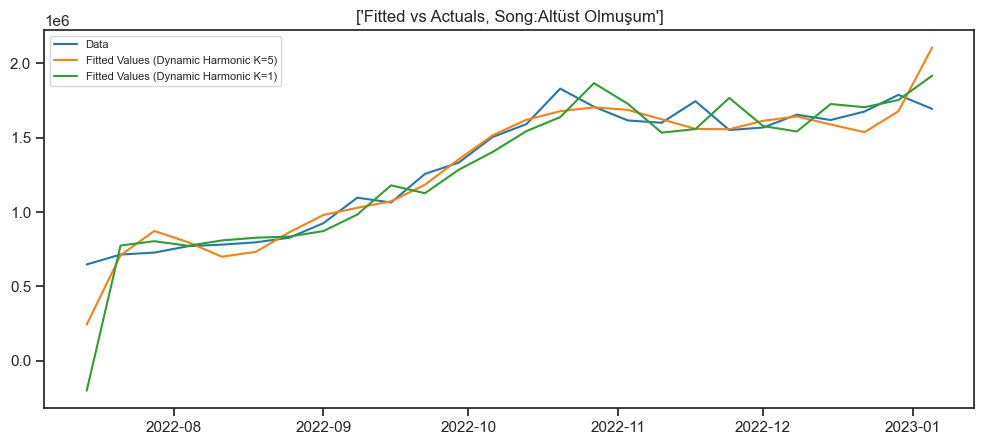

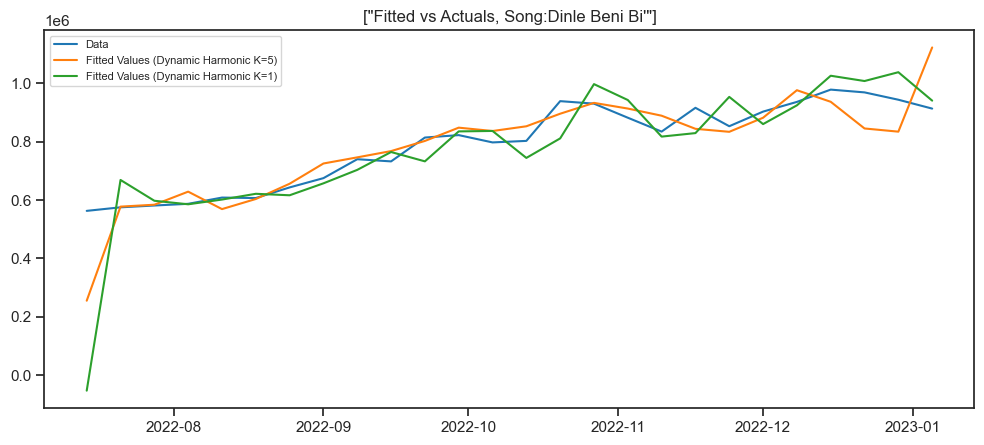

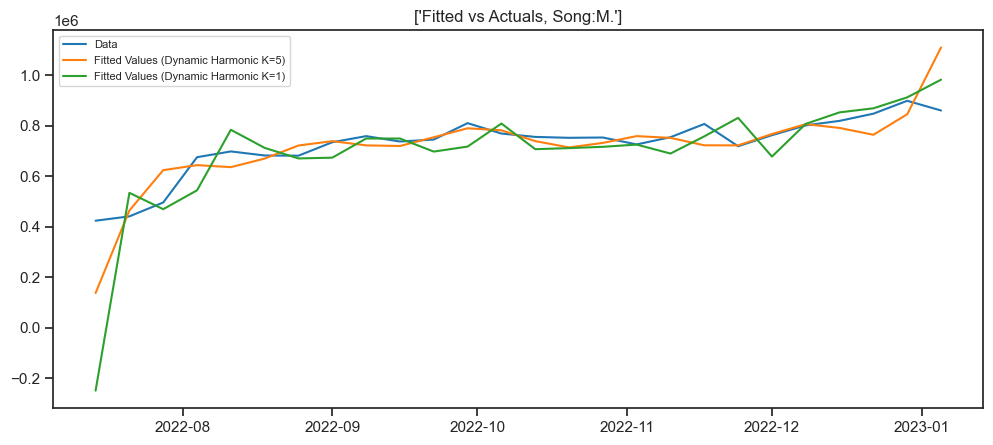

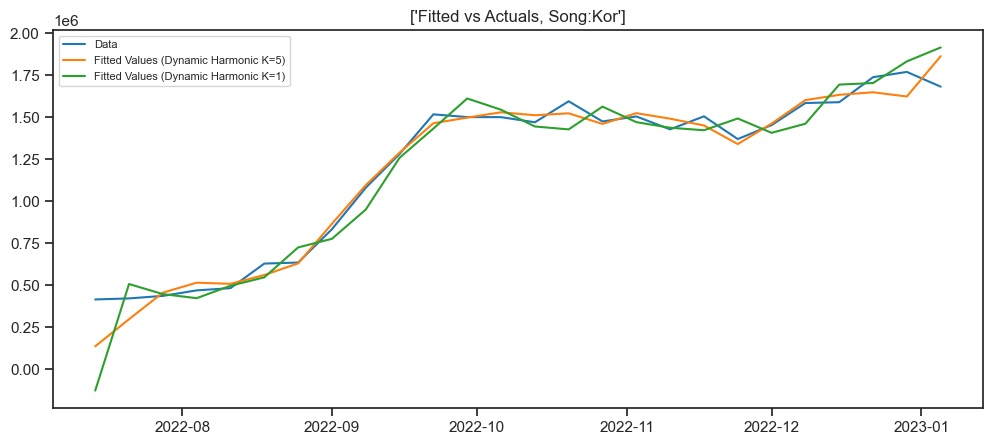

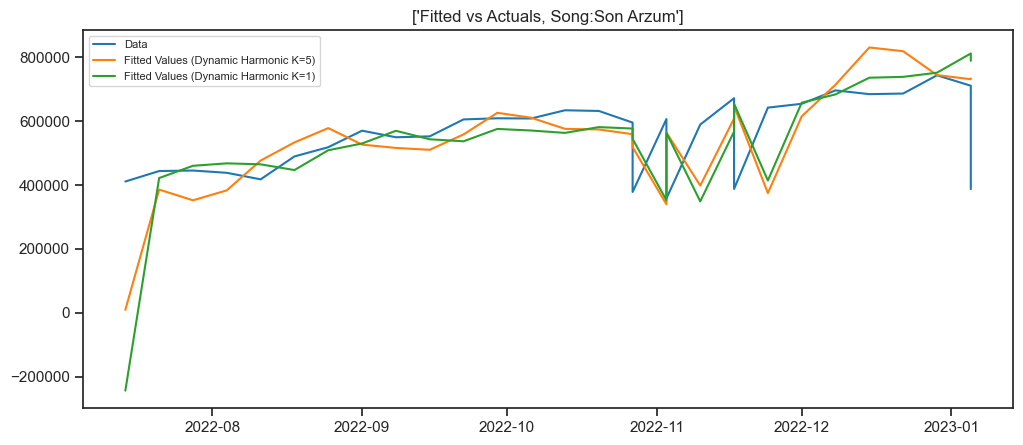

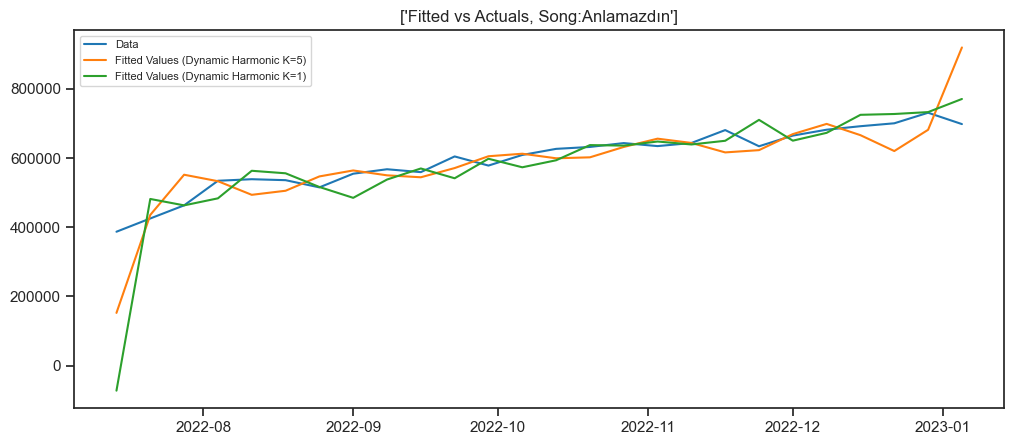

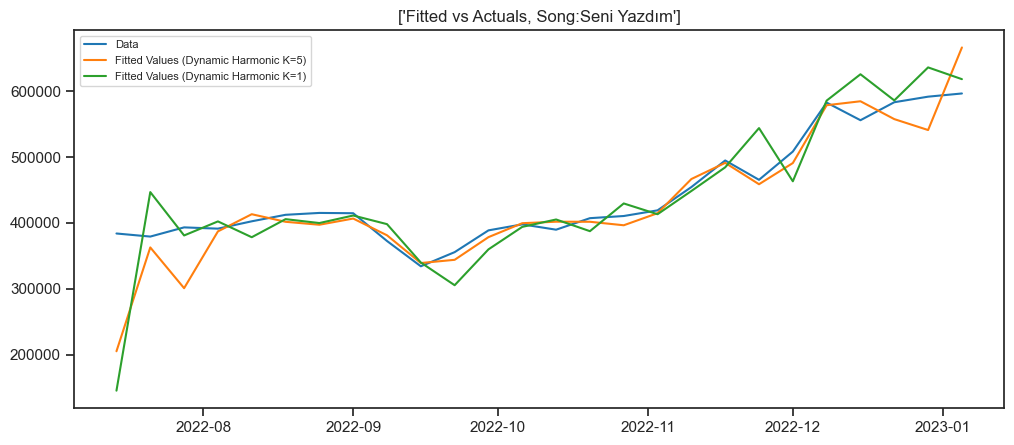

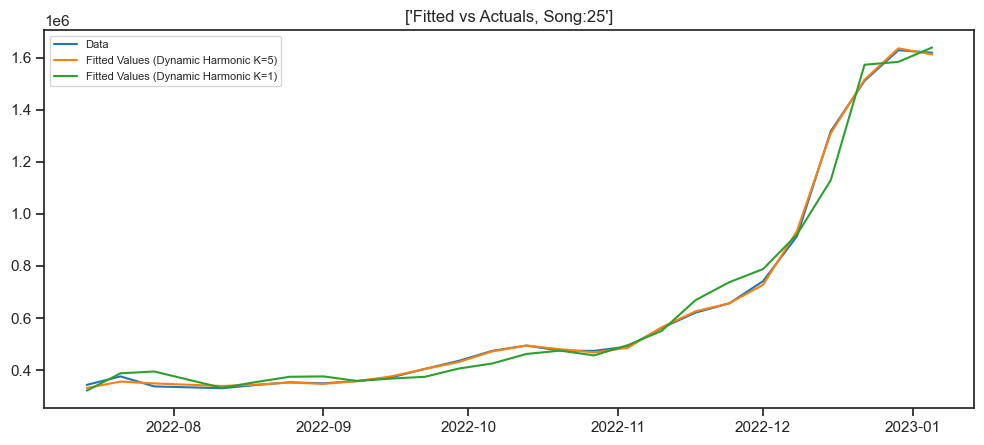

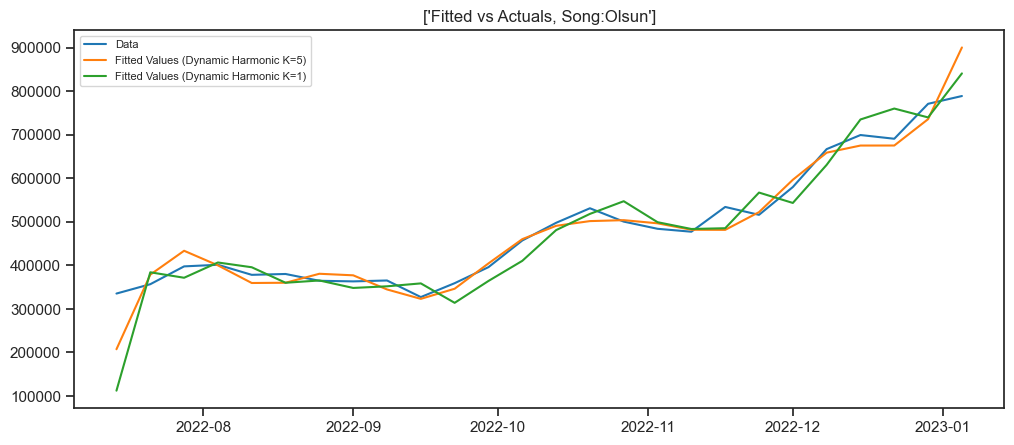

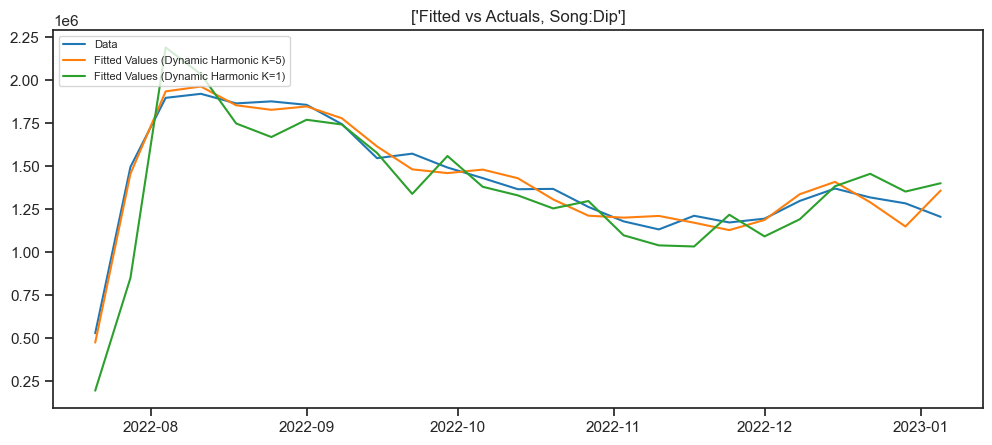

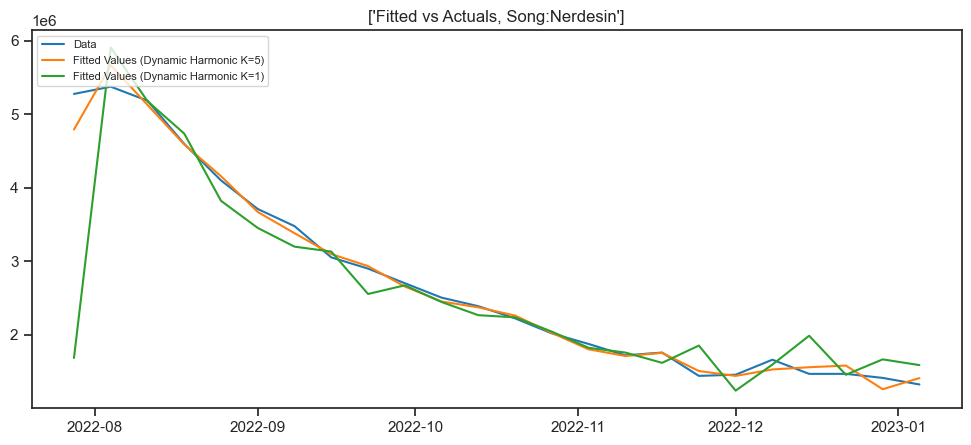

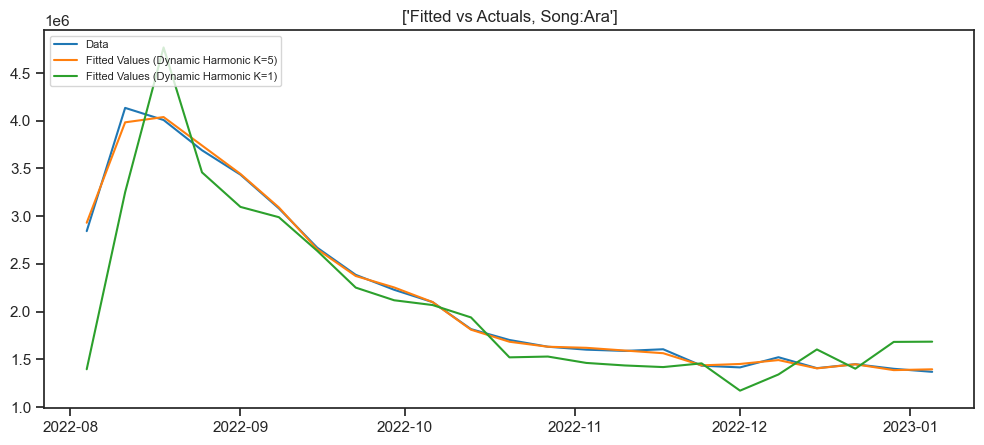

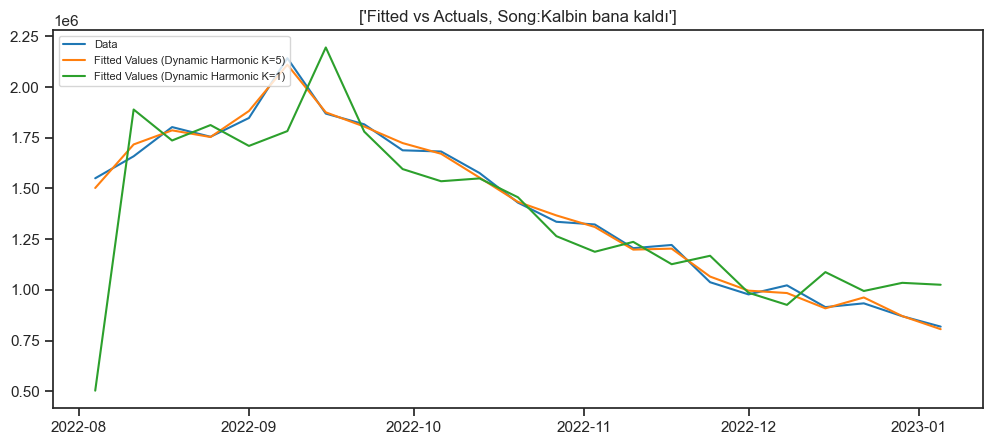

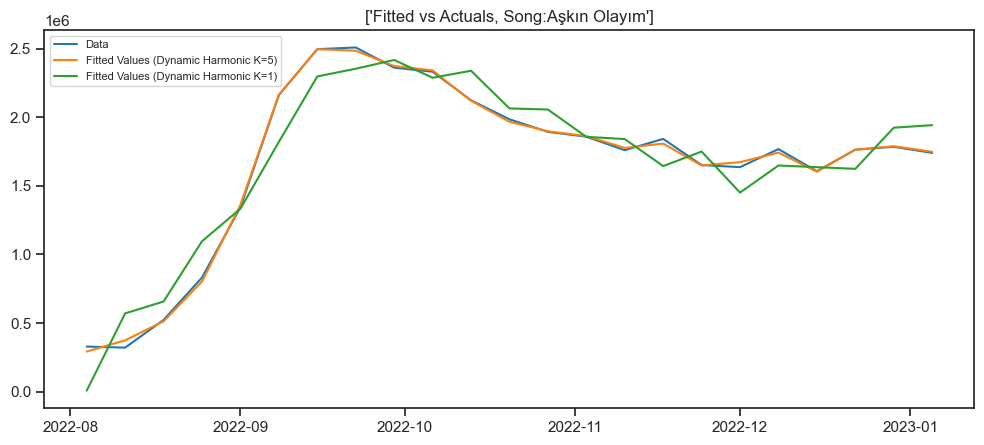

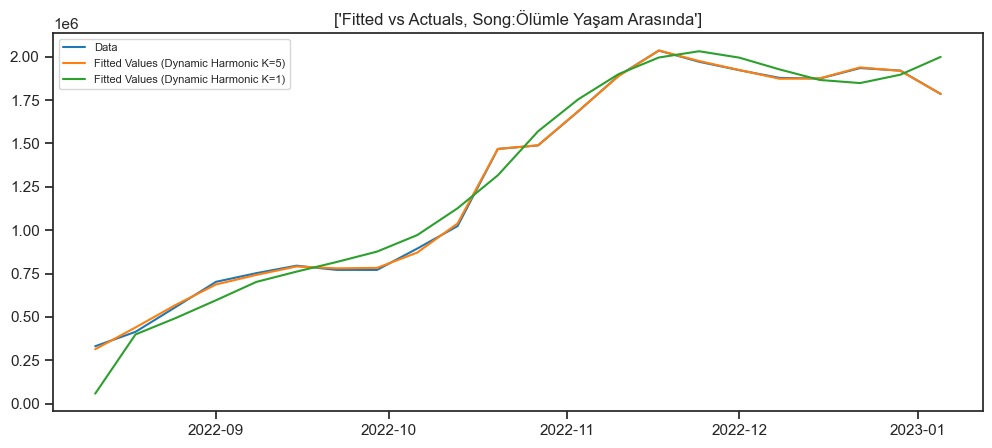

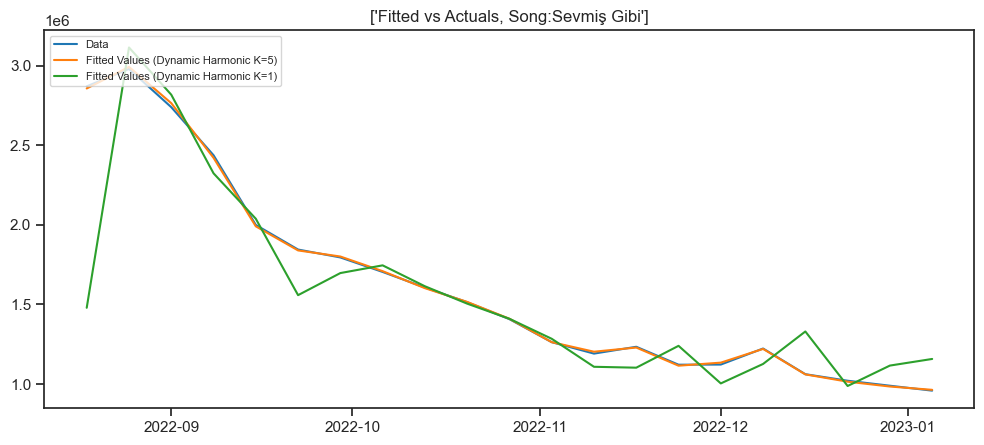

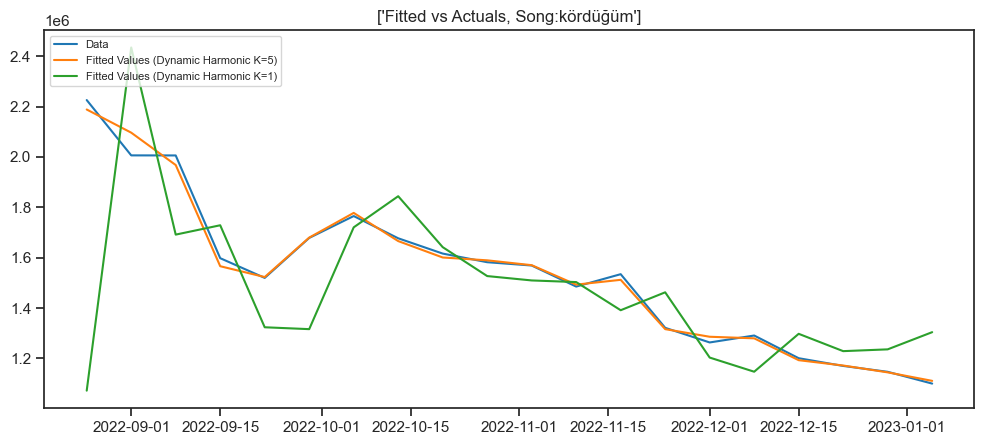

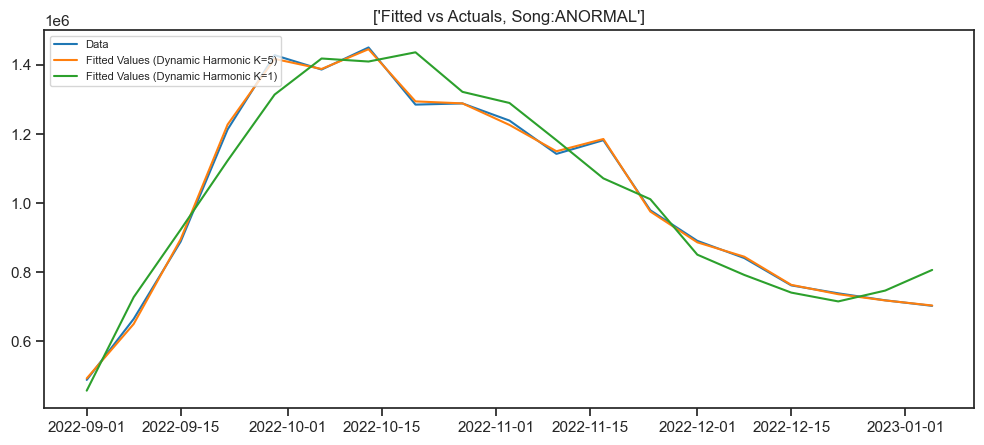

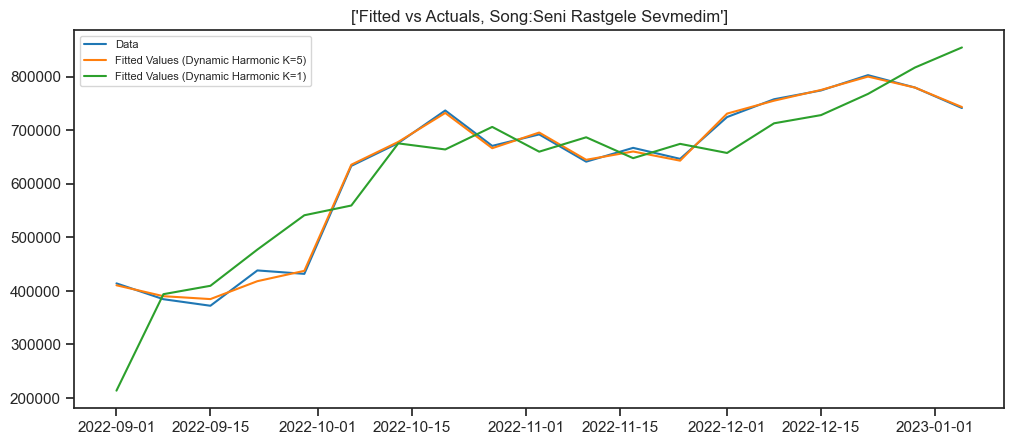

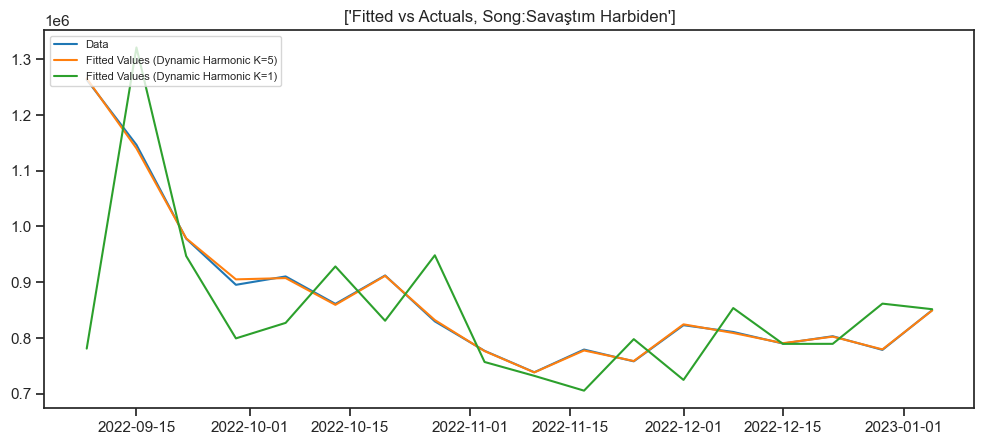

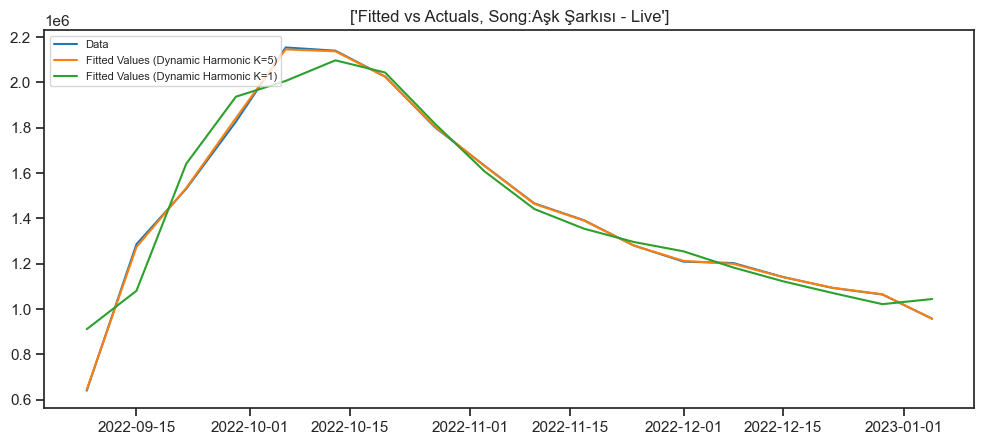

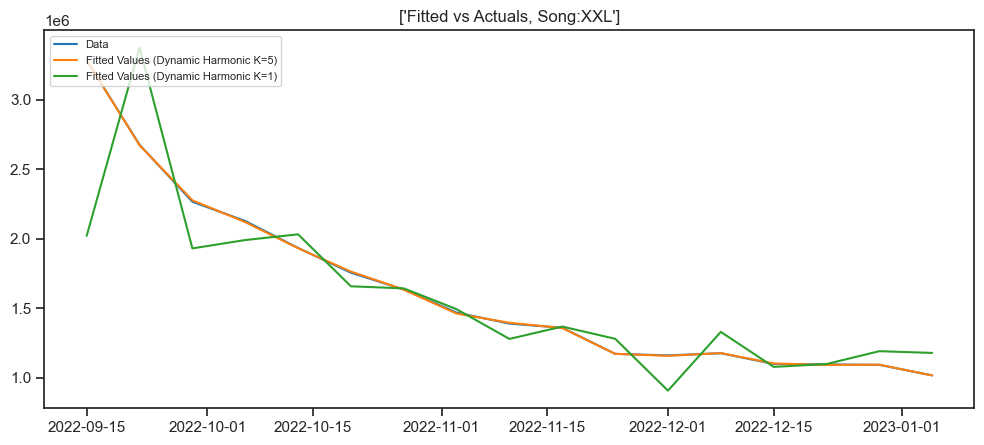

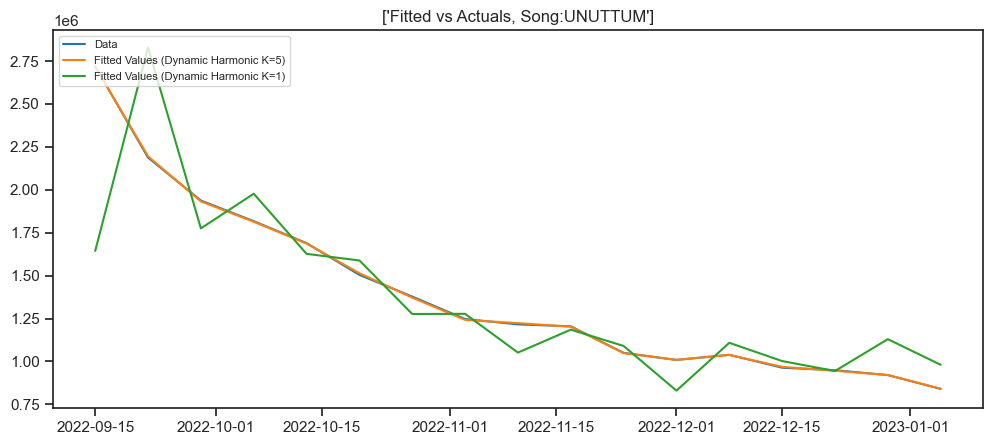

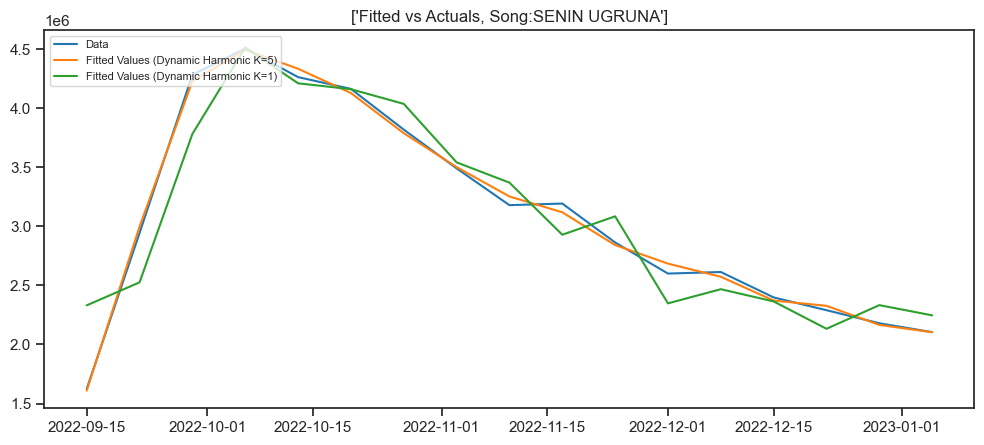

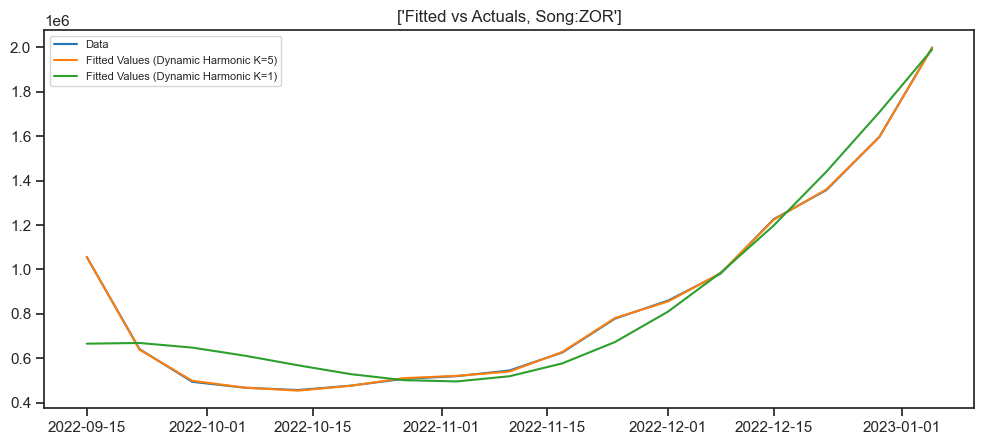

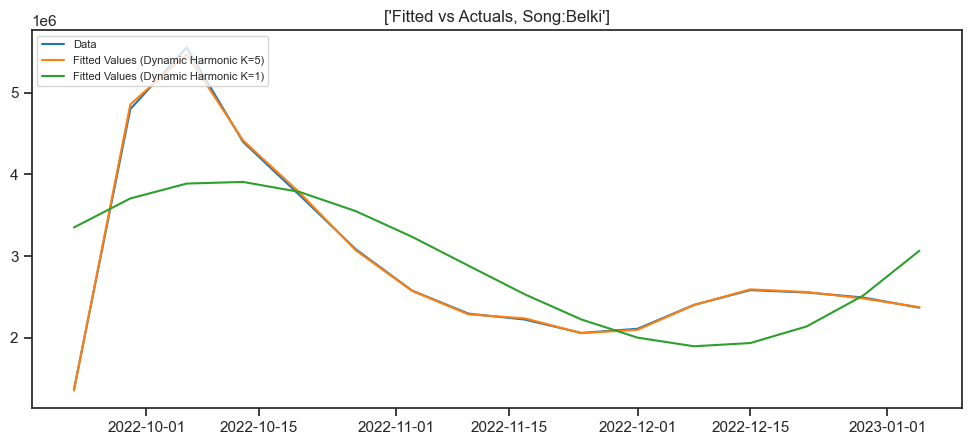

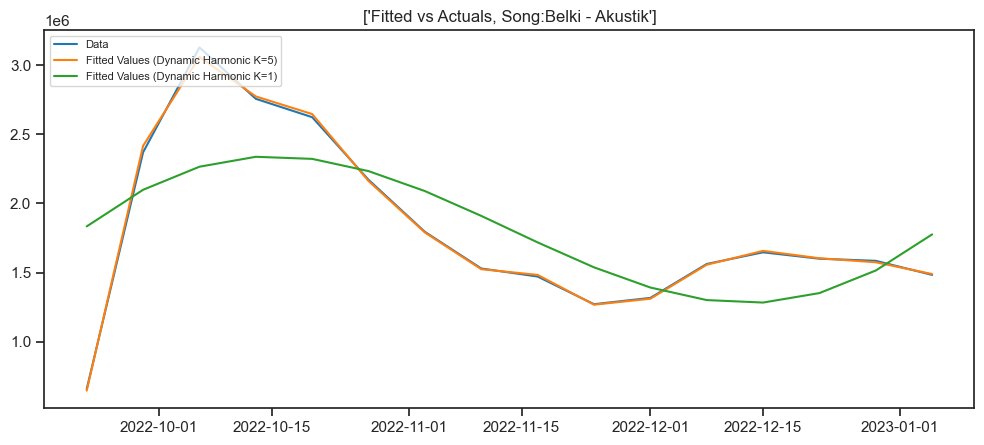

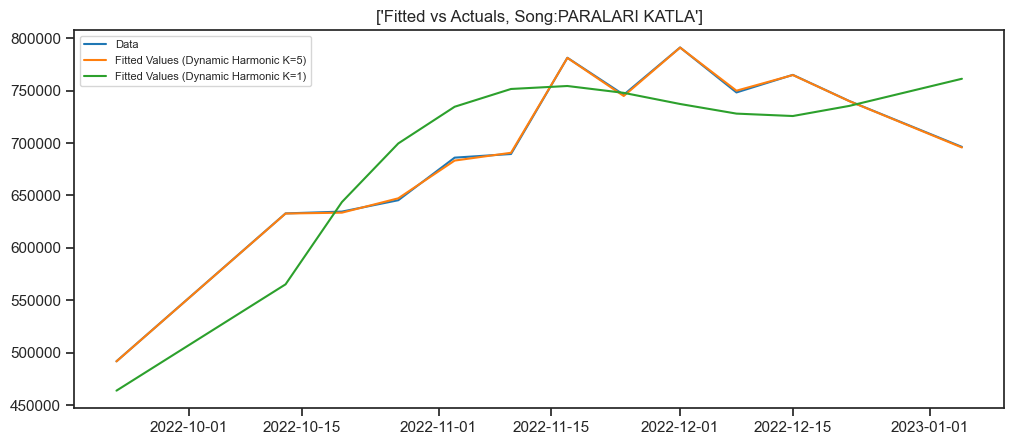

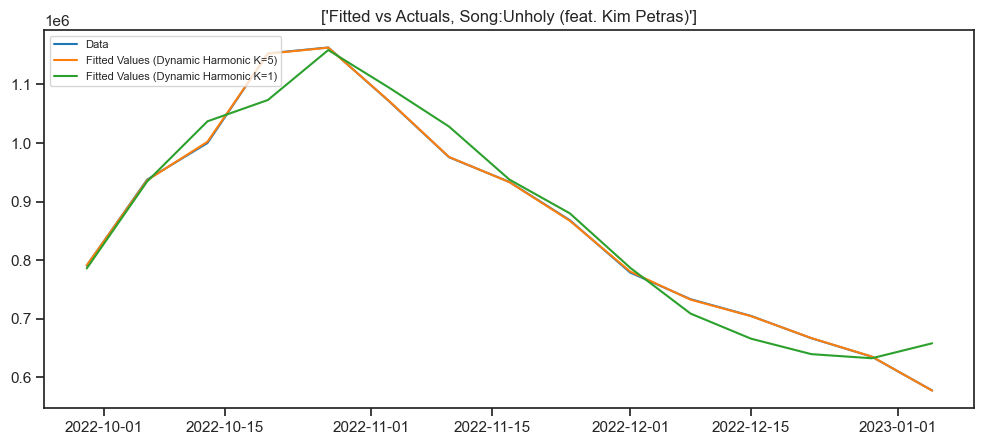

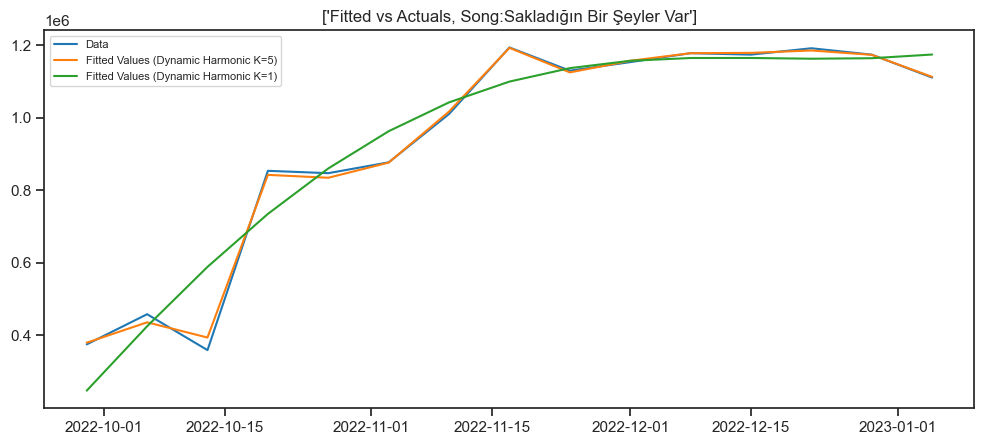

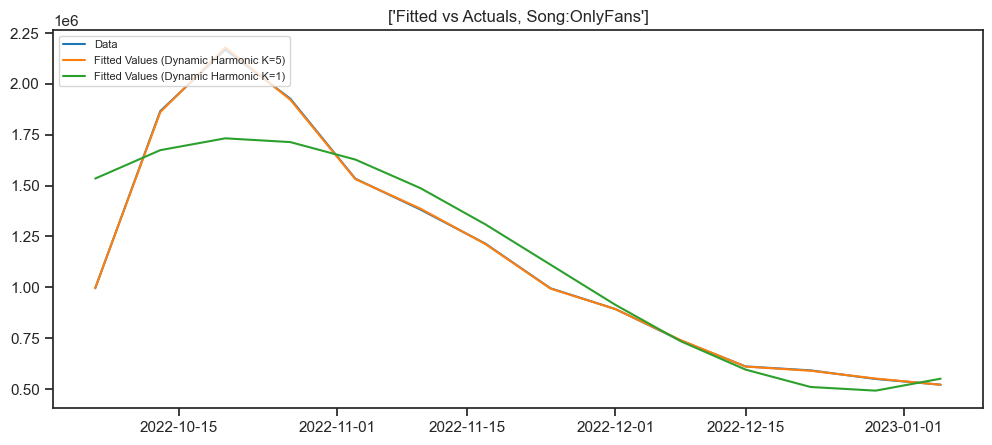

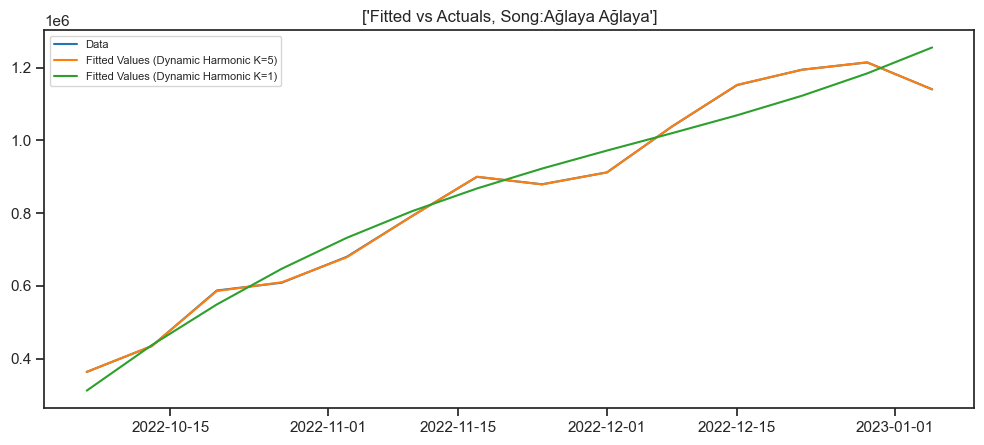

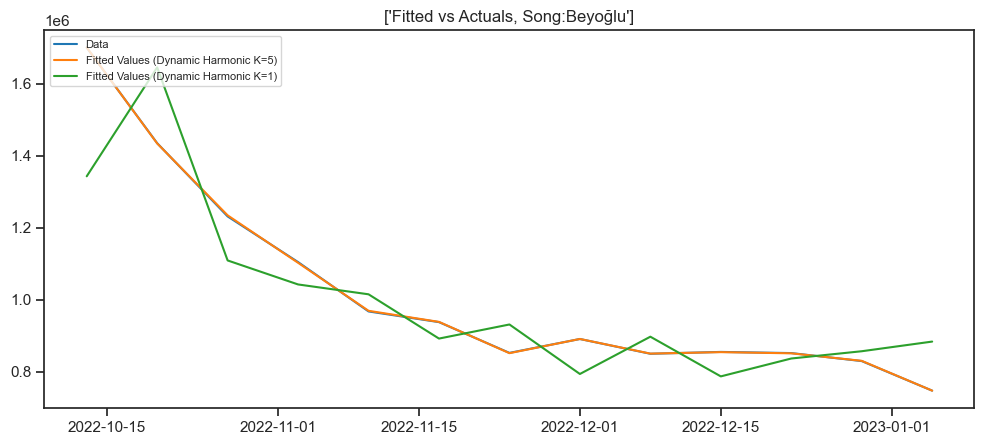

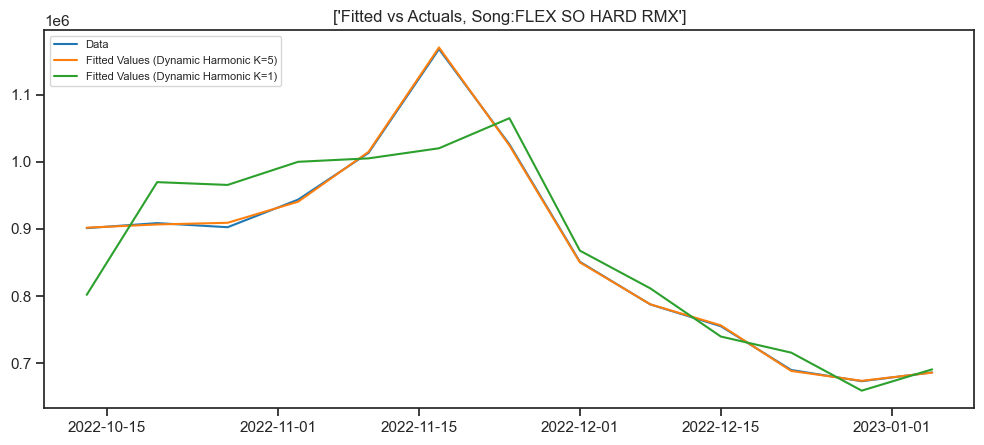

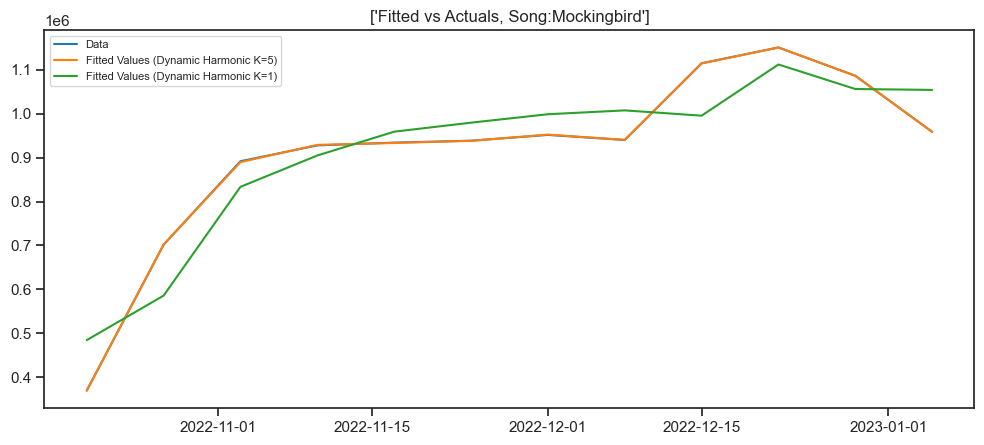

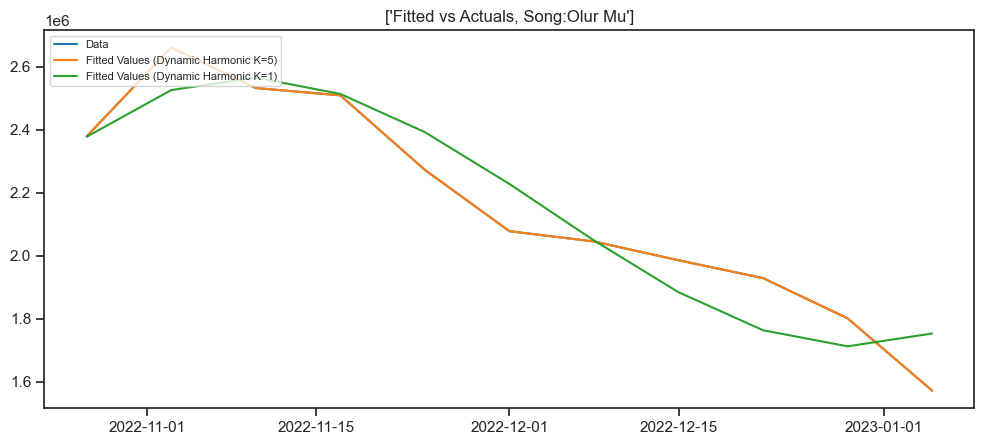

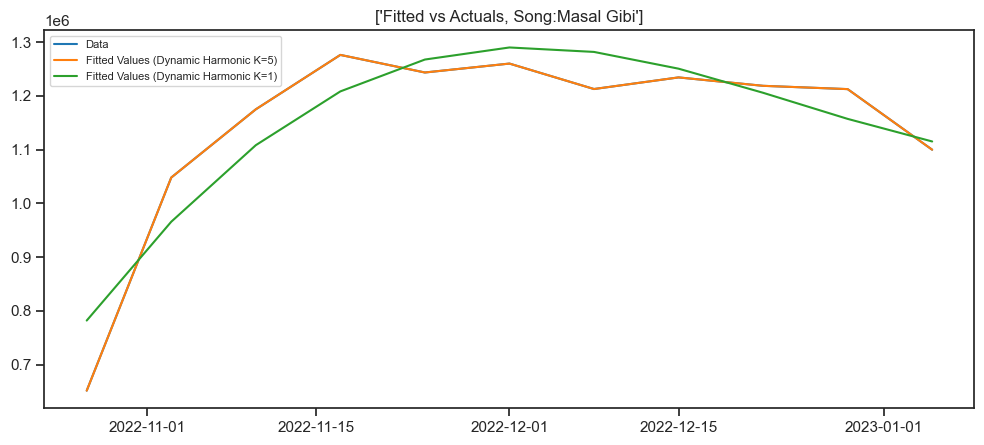

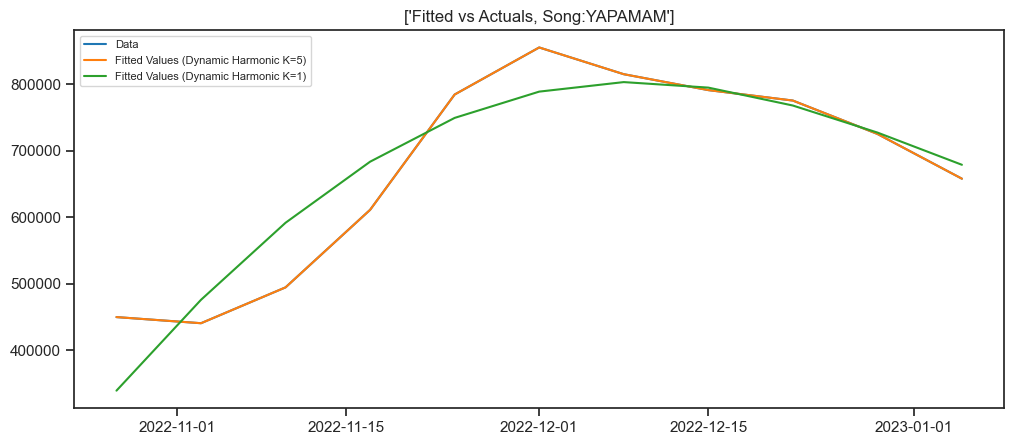

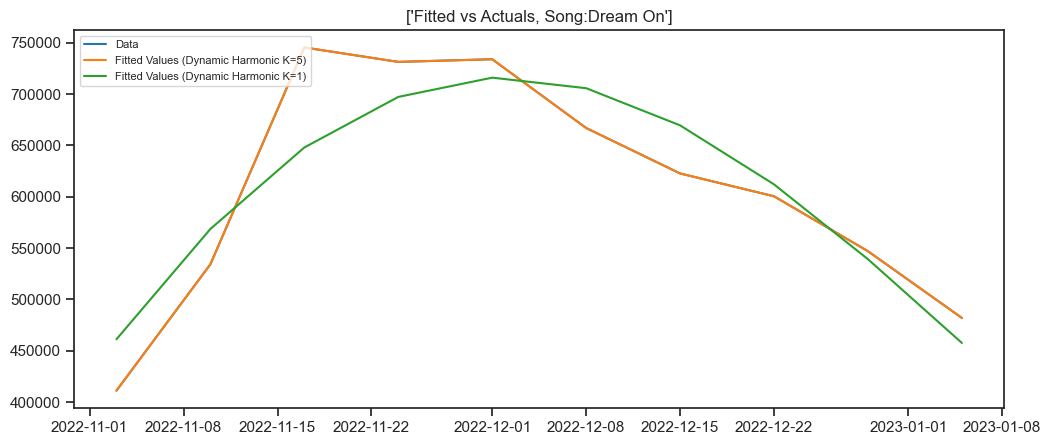

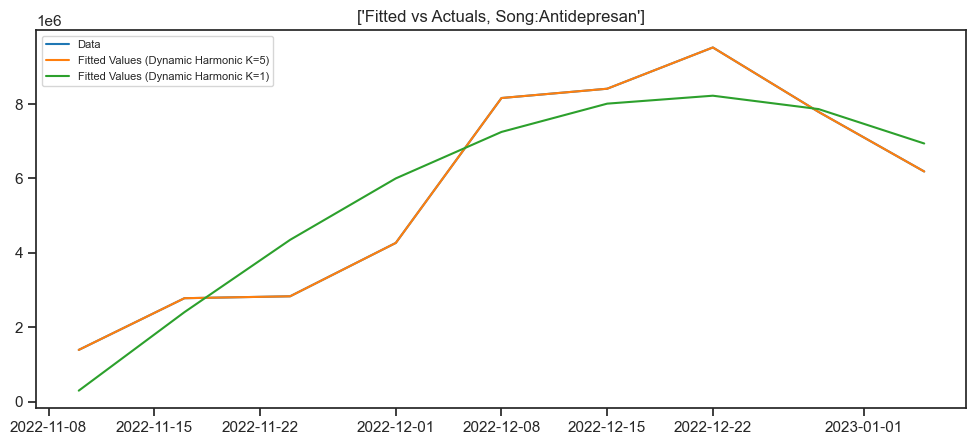

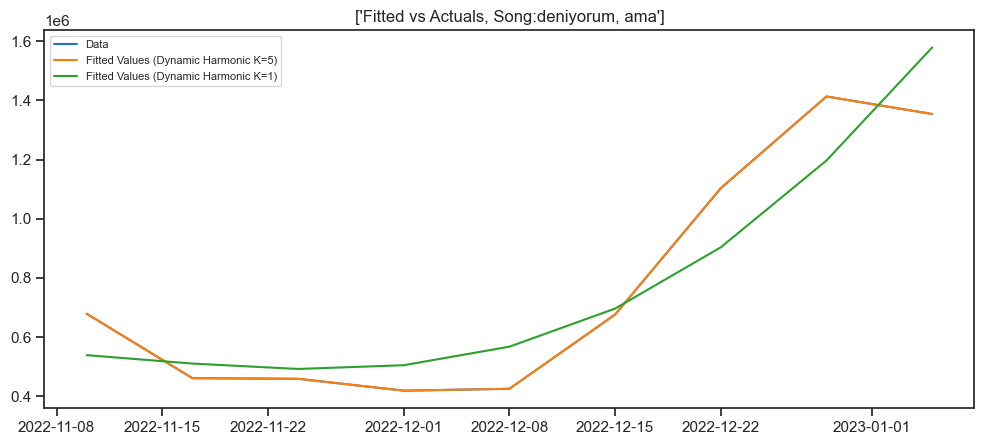

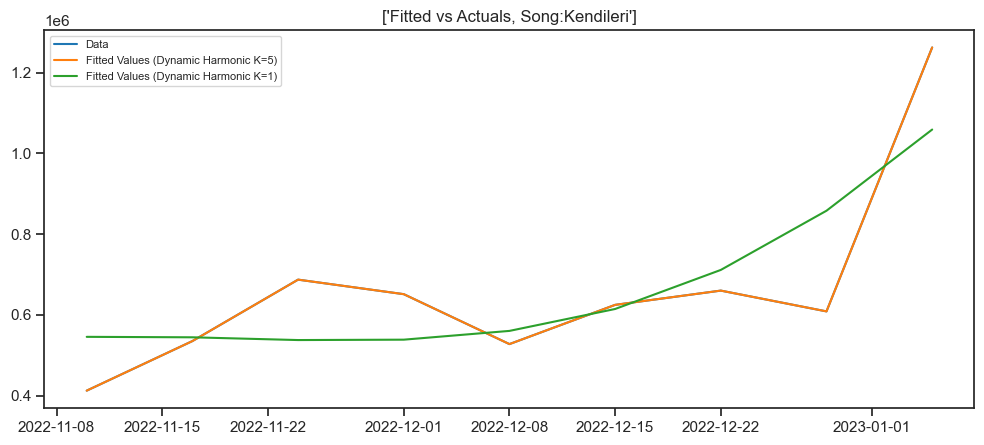

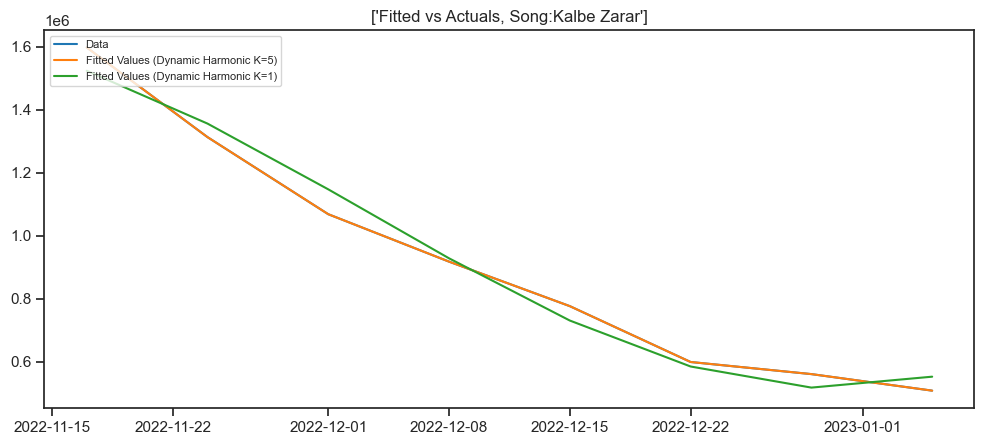

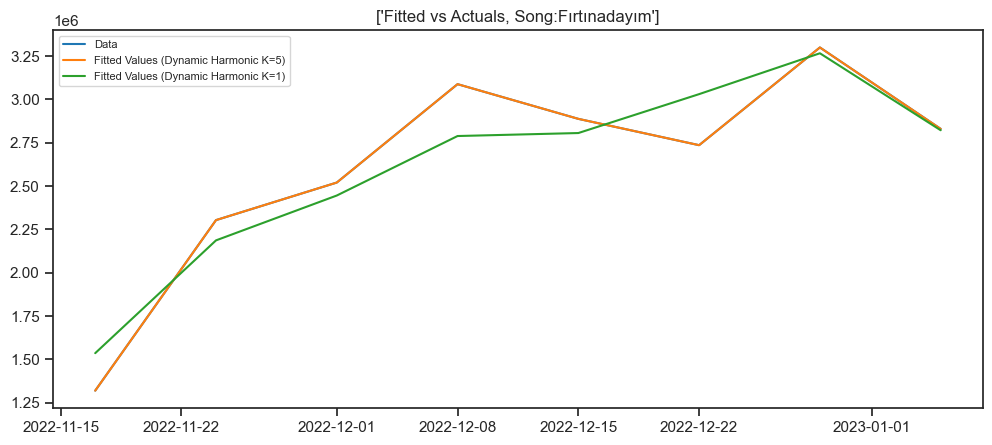

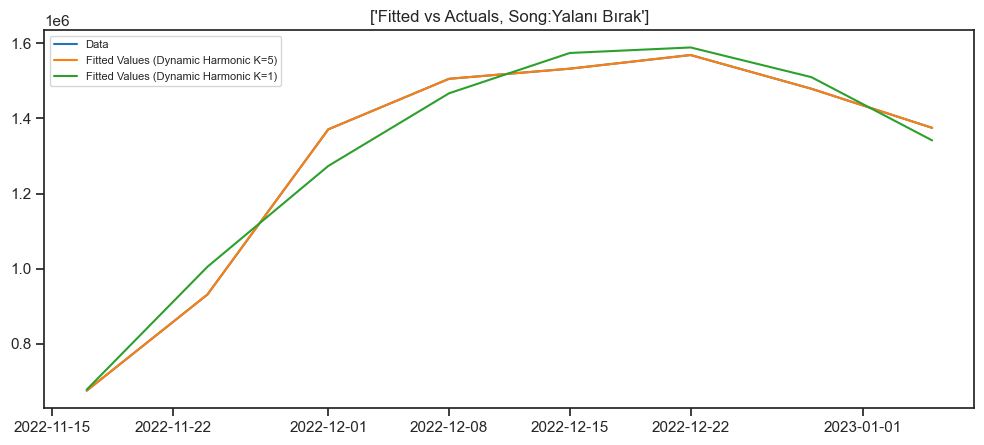

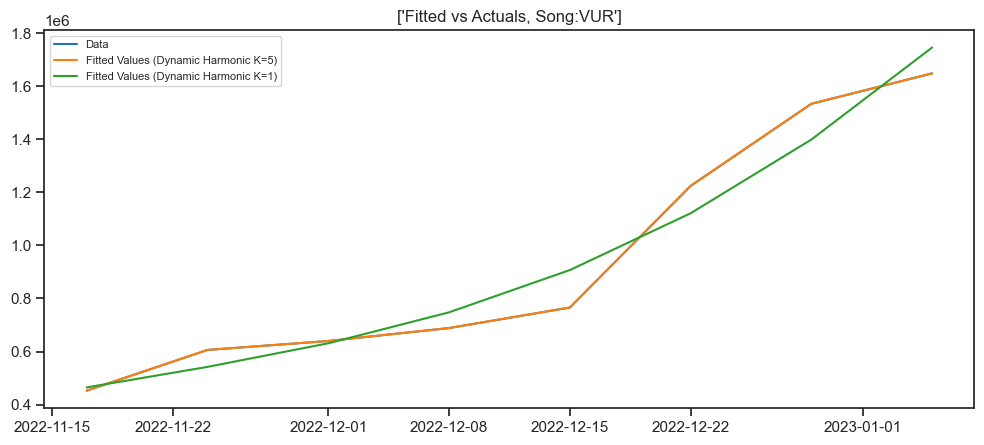

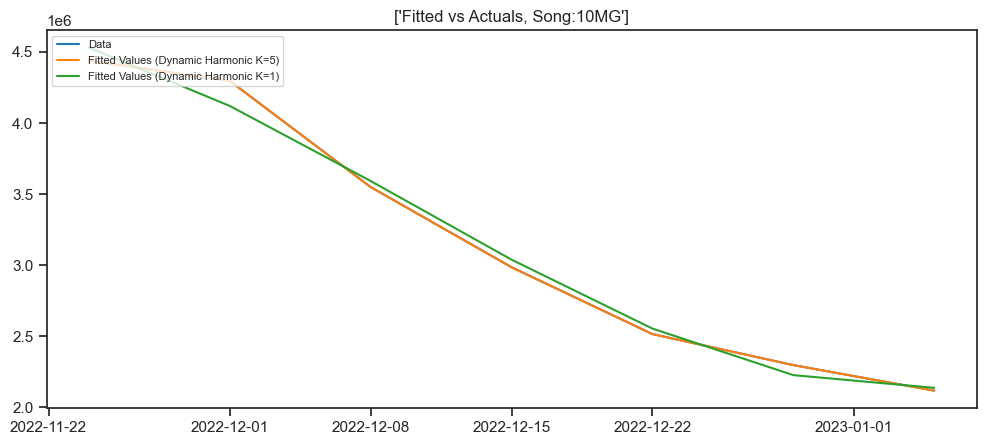

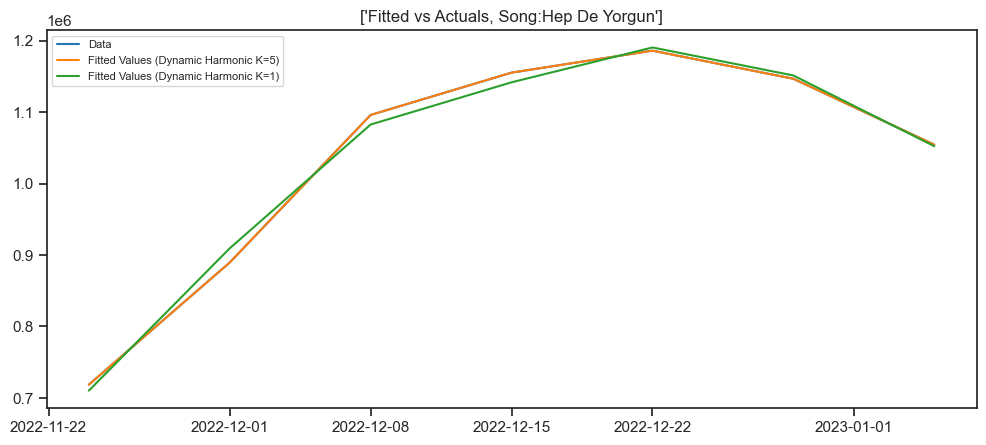

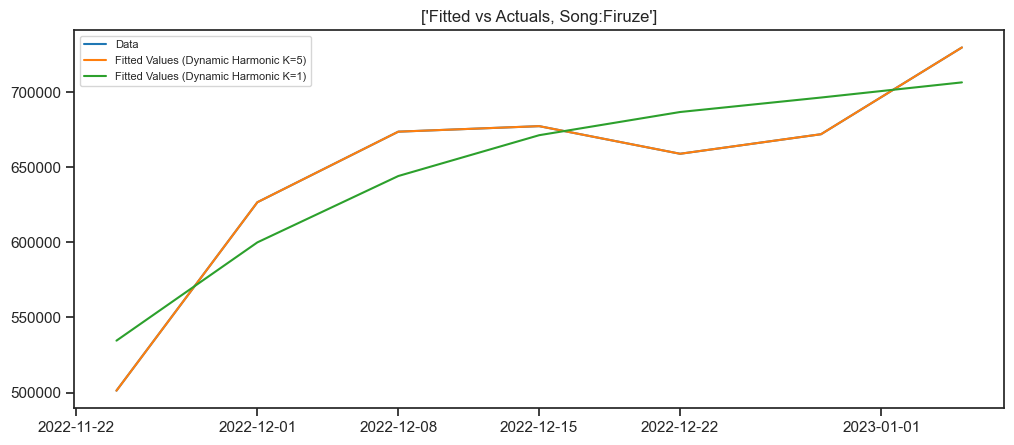

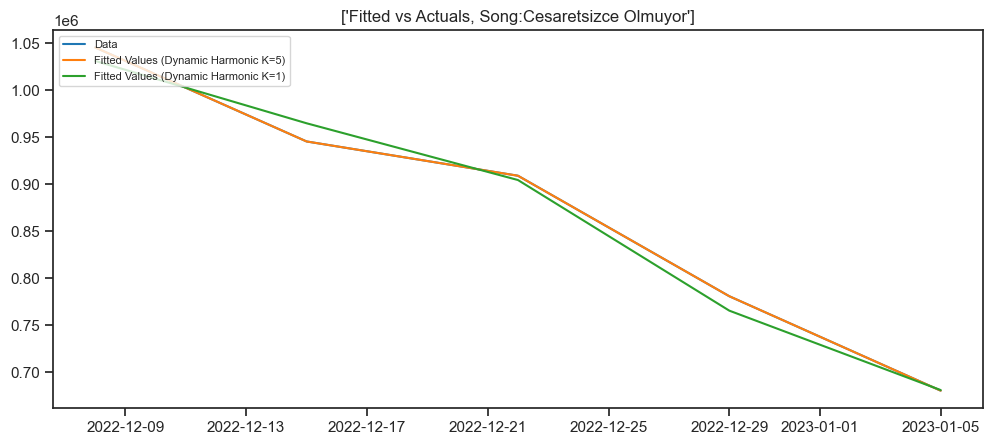

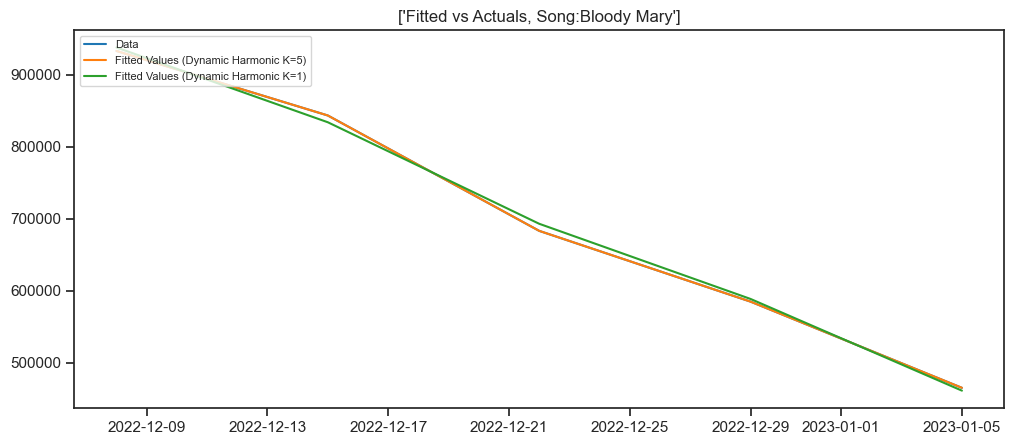

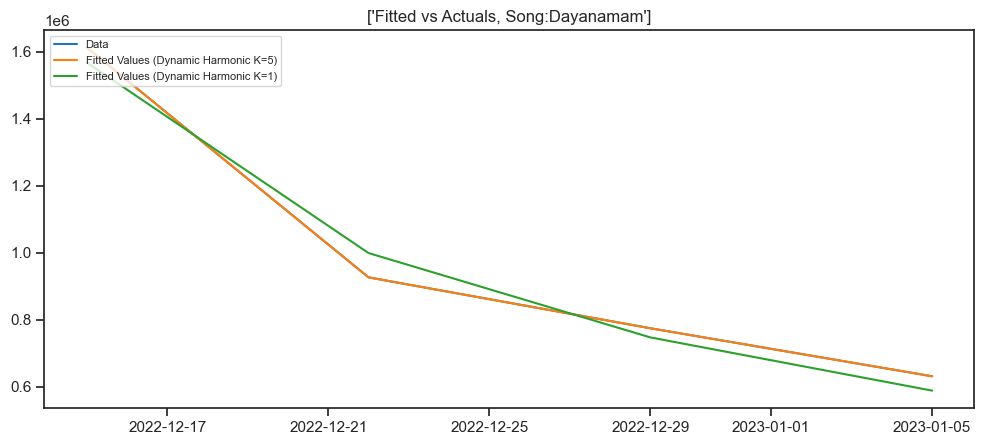

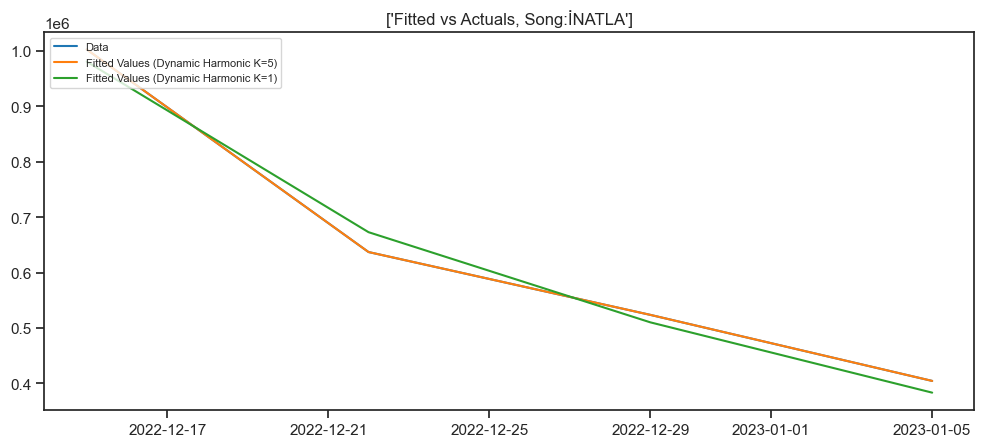

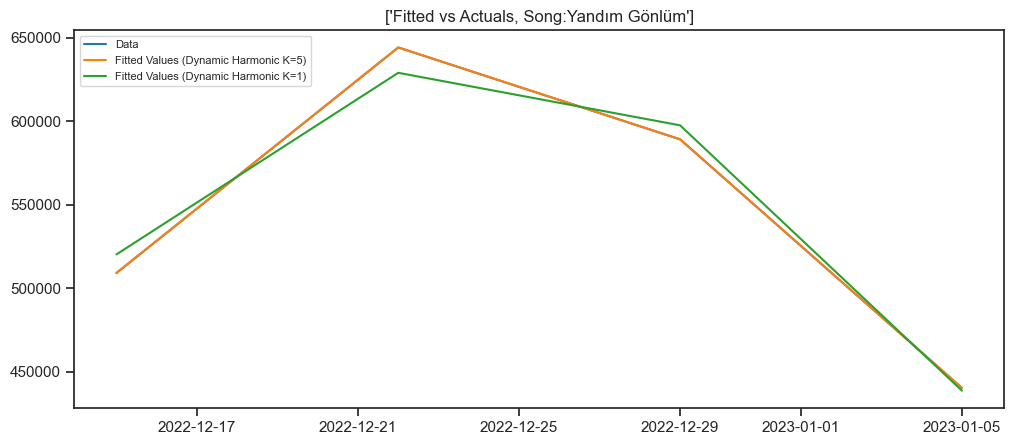

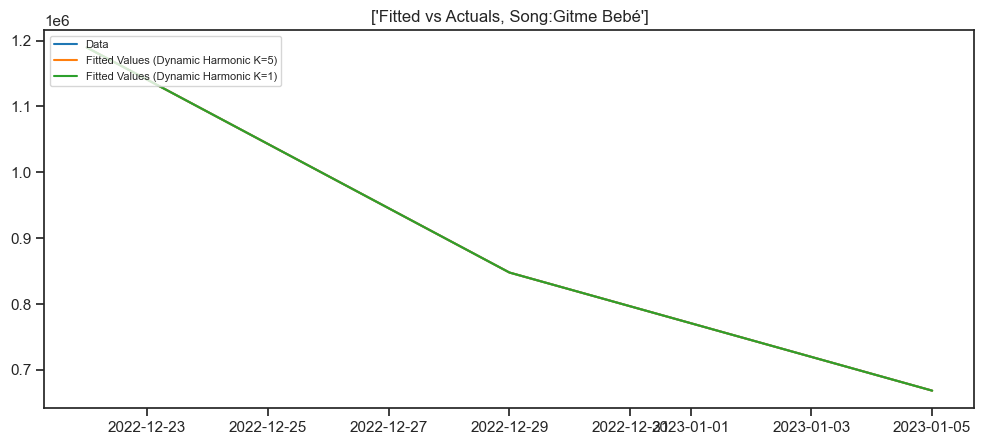

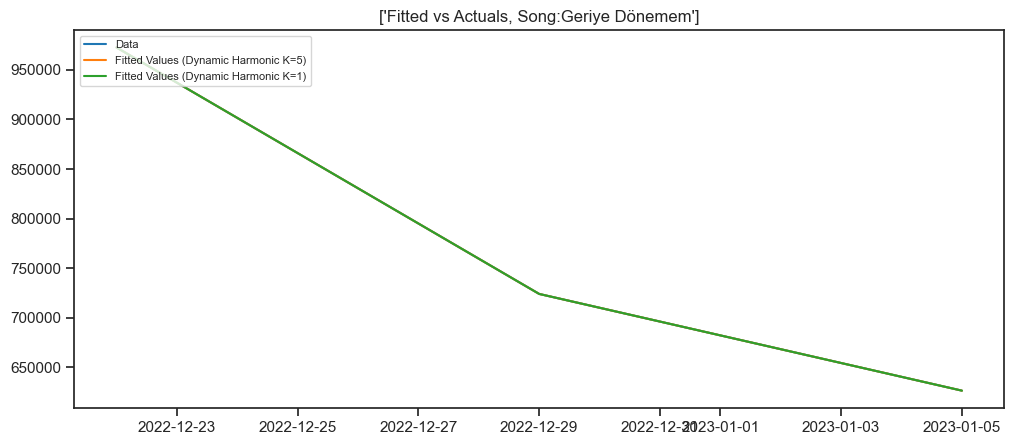

In [22]:
#dynamic harmonic regression
#We generate sin cos variables and set these plus the trend into our X regressors. 
#This is a regression model with ARIMA errors. 
#K=5 gives better results, as AIC decreases as K increases from 1 to 5 and starts to increase afterwards. 
#Errors are modeled as ARIMA (1,0,0) hence the AIC values are calculated across the same datapoints.

rmse_results= dict()
forecasts= dict()

for j in list:
    SongData = pd.DataFrame()
    SongData['Streams']=df[j]['streams']
    SongData['Trend']=np.arange(len(SongData))+1
    m=26
    
    K=1
    for i in range(K): SongData['Sin'+str(i+1)] = np.sin(2*(i+1)*np.pi*SongData['Trend']/m)
    for i in range(K): SongData['Cos'+str(i+1)] = np.cos(2*(i+1)*np.pi*SongData['Trend']/m)

    rng=list[range(0,int(2+2*K))]
    formula = "+".join(SongData.columns[2:(len(SongData.columns))])
    formula="Streams~Trend+"+formula
    SongData_reg1=auto_arima(SongData['Streams'],exogenous=np.array(SongData.iloc[:,1:int(2*K+2)]),trend='c',seasonal=False,start_p=0,max_p=3,start_q=0,max_q=3)

    SongData_reg_fitted1=SongData['Streams']-SongData_reg1.resid()
    
    K=5
    for i in range(K): SongData['Sin'+str(i+1)] = np.sin(2*(i+1)*np.pi*SongData['Trend']/m)
    for i in range(K): SongData['Cos'+str(i+1)] = np.cos(2*(i+1)*np.pi*SongData['Trend']/m)

    rng=list[range(0,int(2+2*K))]
    formula = "+".join(SongData.columns[2:(len(SongData.columns))])
    formula="Streams~Trend+"+formula
    SongData_reg2=auto_arima(SongData['Streams'],exogenous=np.array(SongData.iloc[:,1:int(2*K+2)]),trend='c',seasonal=False,start_p=0,max_p=3,start_q=0,max_q=3)

    SongData_reg_fitted2=SongData['Streams']-SongData_reg2.resid()
    
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(SongData['Streams'], label='Data')
    plt.plot(SongData_reg_fitted2, label='Fitted Values (Dynamic Harmonic K=5)')
    plt.plot(SongData_reg_fitted1, label='Fitted Values (Dynamic Harmonic K=1)')
    t = df[j]['track_name'].unique()
    plt.title('Fitted vs Actuals, Song:' + t)
    plt.legend(loc='upper left', fontsize=8)
    
    w = df[j]['total_weeks'].unique().item()
    SongData_reg_fitted2_week1=SongData.loc[SongData['Trend'] == w-1, 'Streams'][0]-SongData_reg2.resid()[-2]
    SongData_reg_fitted2_week2=SongData.loc[SongData['Trend'] == w, 'Streams'][0]-SongData_reg2.resid()[-1]
    forecast_2=(SongData_reg_fitted2_week1+SongData_reg_fitted2_week2)/2
    rmse_2 = np.sqrt(np.sum(SongData_reg2.resid()**2)/w)
    
    z = df[j]['track_name'].unique().item()
    rmse_results[z]=rmse_2
    forecasts[z]=forecast_2
    
    #print('Song:', t, ' ', 'forecast:', forecast_2, ' ', 'rmse:', rmse_2, ' ')

plt.show()

In [23]:
columns = ['Song', 'RMSE']
df_rmse_results = pd.DataFrame(rmse_results.items(), columns=columns)
df_rmse_results.style.format({'R3 (uV)': "{:.2E}"})

In [24]:
columns = ['Song', 'Forecast for 6-12 Jan 2023']
df_forecasts = pd.DataFrame(forecasts.items(), columns=columns)
df_forecasts.style.format({'R3 (uV)': "{:.2E}"})

In [25]:
#Some of the songs forecast did not perform well with dynamic harmonic regression.
#At this part of the project, we apply Moving Average 2 for the songs with more stationary trend. 
#We also decided to apply MA2 to the songs that did not perform well with dynamic harmonic regression

#The song list with RMSE higher than 50000 resulted from Dynamic Harmonic Regression
song_list_dhr = ['Diğer Yarım','Suçlarımdan Biri','İmdat','Konum Gizli (feat. Murda)','Mingoflalar',
                'Bilir O Beni','Aşk Sadece Anlayana','Olmazlara İnat','Al Sevgilim','NKBİ','Affettim',
                'PARA','Imdat','Birader','Gitme','Herkes Gibisin','Bir Derdim Var','Altüst Olmuşum',
                "Dinle Beni Bi'",'M.','Kor','Dip'] 

#The song list that do not show any trend, meaning that they are more suitable for MA2

song_list_notrend= ['Bi\' Tek Ben Anlarım','Unutmak Öyle Kolay Mı Sandın','Gökyüzünü Tutamam',
                   'Seni Dert Etmeler','ARASAN DA','Another Love','Ah Canım Sevgilim - Demo',
                   'GELMEZSEN GELME','Creepin\' (with The Weeknd & 21 Savage)','Bu Saatten Sonra',
                   'Mahşer','Yarım Kalan Sigara','Yara','Değilim Bi Aşık','CINDY','Düşer Aklıma',
                   'Keskin','Outro','Derinden / bazen hayat çok kötü gidiyor ve ben onu nasıl anlatacağımı bilemiyorum',
                   'PAPARAZZI','Inzaghi','Uzunlar - V1','Son Arzum','Gamzedeyim Deva Bulmam',
                   'Karakol','Son Durağın','Pusulam Rüzgar','Superman']


In [26]:
df_high_rmse = df_final[df_final['track_name'].isin(song_list_dhr)]

In [27]:
mapping_df_high_rmse=df_high_rmse.drop_duplicates(subset=['track_name', 'Song ID'])
mapping_df_high_rmse.head(30)

track_name  weeks_on_chart  streams       Week Trend  \
26                  Diğer Yarım               1  2925556 2022-07-14     x   
52             Suçlarımdan Biri              16  2907718 2022-07-14     x   
78                        İmdat              13  2236439 2022-07-14     x   
104   Konum Gizli (feat. Murda)               9  2185012 2022-07-14     x   
130                 Mingoflalar               2  2037068 2022-07-14     x   
182                Bilir O Beni              20  1867265 2022-07-14     x   
208         Aşk Sadece Anlayana               9  1673218 2022-07-14     x   
234              Olmazlara İnat              10  1661140 2022-07-14     x   
312                 Al Sevgilim              14  1291367 2022-07-14     x   
364                        NKBİ               6  1224176 2022-07-14     x   
390                    Affettim              26  1218311 2022-07-14     x   
441                        PARA              10  1081961 2022-07-14     x   
493                       Imdat               2  1038917 2022-07-14     x   
597                     Birader              15   895925 2022-07-14     x   
675                       Gitme             172   803268 2022-07-14     x   
779              Herkes Gibisin              10   738959 2022-07-14     x   
805              Bir Derdim Var             285   658276 2022-07-14     x   
857              Altüst Olmuşum              55   647224 2022-07-14     x   
883              Dinle Beni Bi'             229   562899 2022-07-14     x   
961                          M.              32   423974 2022-07-14     x   
987                         Kor              40   414010 2022-07-14     x   
1195                        Dip              33   528557 2022-07-21     x   

     No Trend  Song ID  total_weeks  
26        NaN       15           26  
52        NaN       18           26  
78        NaN       88           26  
104       NaN       92           26  
130       NaN       83           26  
182       NaN       70           26  
208       NaN       65           26  
234       NaN       35           26  
312       NaN       57           26  
364       NaN        8           26  
390       NaN       80           26  
441       NaN       94           26  
493       NaN       93           26  
597       NaN       91           26  
675       NaN       37           26  
779       NaN       42           26  
805       NaN       25           26  
857       NaN       14           26  
883       NaN       47           26  
961       NaN       61           26  
987       NaN       13           26  
1195      NaN       24           26

In [28]:
list2 = df_high_rmse['Song ID'].unique() #72

for i in list2:
    df[i] = (df_high_rmse[df_high_rmse["Song ID"] == i])
    df[i]=df[i].loc[:, ["streams","Week","track_name","Song ID"]]
    df[i].set_index(df[i].Week,inplace=True)
    df[i]=df[i].drop('Week', axis=1)
    
    SongData = pd.DataFrame()
    SongData['Streams']=df[i]['streams']
    df[i]['Trend']=np.arange(len(SongData))+1
    df[i]['total_weeks'] = df[i].groupby('Song ID')['Trend'].transform('max')

In [29]:
df[15].head()

streams   track_name  Song ID  Trend  total_weeks
Week                                                         
2022-07-14  2925556  Diğer Yarım       15      1           26
2022-07-21  3585198  Diğer Yarım       15      2           26
2022-07-28  3447156  Diğer Yarım       15      3           26
2022-08-04  3192990  Diğer Yarım       15      4           26
2022-08-11  3013297  Diğer Yarım       15      5           26

In [30]:
#Box Cox transformation is applied before MA2

def inv_boxcox(x, lmbda):
        return np.exp(np.log1p(lmbda * x) / lmbda) if lmbda != 0 else np.exp(x) 

In [31]:
df_high_rmse['Song ID'].unique()

array([15, 18, 88, 92, 83, 70, 65, 35, 57,  8, 80, 94, 93, 91, 37, 42, 25,
       14, 47, 61, 13, 24])

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error

#Calculate forecast and RMSE Values for MA2+Boxcox

list3 = df_high_rmse['Song ID'].unique() #72

for i in list3:
    fitted_data, fitted_lambda = stats.boxcox(df[i]["streams"])
    df[i]["streams_boxcox"]=fitted_data 
    train, test= np.split(df[i], [int(.80 *len(df[i]))])
    df[i]['MA_2_boxcox'] = df[i].streams_boxcox.rolling(2, min_periods=1).mean()
    df[i]['MA_2_inv_boxcox']=inv_boxcox(df[i]['MA_2_boxcox'],fitted_lambda)
    rmse_ma2_boxcox = sqrt(mean_squared_error(test.streams, df[i].MA_2_inv_boxcox.tail(len(test))))
    w = df[i]['total_weeks'].unique().item()
    forecast=((df[i].loc[df[i]['Trend'] == w-1, 'streams'].item()+df[i].loc[df[i]['Trend'] == w, 'streams'])/2).item()
    z = df[i]['track_name'].unique().item()
    rmse_results[z] = rmse_ma2_boxcox
    forecasts[z] = forecast
    i+=1


In [33]:
columns = ['Song', 'RMSE']
df_rmse_results = pd.DataFrame(rmse_results.items(), columns=columns)
#Updated RMSE results 
df_rmse_results.style.format({'R3 (uV)': "{:.2E}"})

In [34]:
columns = ['Song', 'Forecast for 6-12 Jan 2023']
df_forecasts = pd.DataFrame(forecasts.items(), columns=columns)
df_forecasts.style.format({'R3 (uV)': "{:.2E}"})

In [35]:
#This time, applying MA2 for no-trend songs
df_notrend = df_copy[df_copy['No Trend'] == 'x'] #Burası MA için 'No Trend' ile çalışacak
df_notrend=df_notrend.drop(['Trend','No Trend'], axis=1)
df_notrend.head(5)

track_name  weeks_on_chart  streams       Week  Song ID  \
0  Bi' Tek Ben Anlarım              17  3096763 2022-07-14        2   
1  Bi' Tek Ben Anlarım              18  3433534 2022-07-21        2   
2  Bi' Tek Ben Anlarım              19  3543380 2022-07-28        2   
3  Bi' Tek Ben Anlarım              20  3664487 2022-08-04        2   
4  Bi' Tek Ben Anlarım              21  3527370 2022-08-11        2   

   total_weeks  
0           26  
1           26  
2           26  
3           26  
4           26

In [36]:
list3 = df_notrend['Song ID'].unique() #72

for i in list3:
    df[i] = (df_notrend[df_notrend["Song ID"] == i])
    df[i]=df[i].loc[:, ["streams","Week","track_name","Song ID"]]
    df[i].set_index(df[i].Week,inplace=True)
    df[i]=df[i].drop('Week', axis=1)
    
    SongData = pd.DataFrame()
    SongData['Streams']=df[i]['streams']
    df[i]['Trend']=np.arange(len(SongData))+1
    df[i]['total_weeks'] = df[i].groupby('Song ID')['Trend'].transform('max')

In [37]:
df[2].head()

streams           track_name  Song ID  Trend  total_weeks
Week                                                                 
2022-07-14  3096763  Bi' Tek Ben Anlarım        2      1           26
2022-07-21  3433534  Bi' Tek Ben Anlarım        2      2           26
2022-07-28  3543380  Bi' Tek Ben Anlarım        2      3           26
2022-08-04  3664487  Bi' Tek Ben Anlarım        2      4           26
2022-08-11  3527370  Bi' Tek Ben Anlarım        2      5           26

In [38]:
#Box Cox transformation is applied before MA2

def inv_boxcox(x, lmbda):
        return np.exp(np.log1p(lmbda * x) / lmbda) if lmbda != 0 else np.exp(x) 

In [39]:
df_notrend['Song ID'].unique()

array([ 2, 28, 11, 68, 85, 41, 54, 19, 34, 52, 55, 74, 58, 59, 51, 89, 63,
       81, 73,  7, 56, 97, 99, 64, 62, 45])

In [40]:
#Calculate forecast and RMSE Values for MA2+Boxcox
#MA2+Boxcox is applied to all no-trend songs except 'Gökyüzünü Tutamam' (Song ID= 11) and 'Yara' (Song ID= 55)
#This songs are forecasted better with only MA2

list4 = [2, 28, 68, 85, 41, 54, 19, 34, 52, 74, 58, 59, 51, 89, 63,
       81, 73,  7, 56, 97, 99, 64, 62, 45]

for i in list4:
    fitted_data, fitted_lambda = stats.boxcox(df[i]["streams"])
    df[i]["streams_boxcox"]=fitted_data 
    train, test= np.split(df[i], [int(.80 *len(df[i]))])
    df[i]['MA_2_boxcox'] = df[i].streams_boxcox.rolling(2, min_periods=1).mean()
    df[i]['MA_2_inv_boxcox']=inv_boxcox(df[i]['MA_2_boxcox'],fitted_lambda)
    rmse_ma2_boxcox = sqrt(mean_squared_error(test.streams, df[i].MA_2_inv_boxcox.tail(len(test))))
    w = df[i]['total_weeks'].unique().item()
    forecast=((df[i].loc[df[i]['Trend'] == w-1, 'streams'].item()+df[i].loc[df[i]['Trend'] == w, 'streams'])/2).item()
    z = df[i]['track_name'].unique().item()
    rmse_results[z] = rmse_ma2_boxcox
    forecasts[z] = forecast
    i+=1

In [41]:
columns = ['Song', 'RMSE']
df_rmse_results = pd.DataFrame(rmse_results.items(), columns=columns)
#Updated RMSE results 
df_rmse_results.style.format({'R3 (uV)': "{:.2E}"})

In [42]:
columns = ['Song', 'Forecast for 6-12 Jan 2023']
df_forecasts = pd.DataFrame(forecasts.items(), columns=columns)
df_forecasts.style.format({'R3 (uV)': "{:.2E}"})

In [43]:
#MA2+Boxcox is applied to all no-trend songs except 'Gökyüzünü Tutamam' (Song ID= 11) and 'Yara' (Song ID= 55)
#This songs are forecasted better with only MA2

list5 = [ 11, 55]

for i in list5:
    train, test= np.split(df[i], [int(.80 *len(df[i]))])
    df[i]['MA_2'] = df[i].streams.rolling(2, min_periods=1).mean()
    rmse_ma2 = sqrt(mean_squared_error(test.streams, df[i].MA_2.tail(len(test))))
    w = df[i]['total_weeks'].unique().item()
    forecast=((df[i].loc[df[i]['Trend'] == w-1, 'streams'].item()+df[i].loc[df[i]['Trend'] == w, 'streams'])/2).item()
    z = df[i]['track_name'].unique().item()
    rmse_results[z] = rmse_ma2
    forecasts[z] = forecast
    i+=1

In [44]:
columns = ['Song', 'RMSE']
df_rmse_results = pd.DataFrame(rmse_results.items(), columns=columns)
#Updated RMSE results
df_rmse_results.style.format({'R3 (uV)': "{:.2E}"})
#Anlamazdın, Nerdesin, Bi' Tek Ben Anlarım, ARASAN DA, PAPARAZZI, GELMEZSEN GELME, Son Arzum

In [45]:
columns = ['Song', 'Forecast for 6-12 Jan 2023']
df_forecasts = pd.DataFrame(forecasts.items(), columns=columns)
df_forecasts.style.format({'R3 (uV)': "{:.2E}"})

In [46]:
df_rmse_results.to_csv('export_dataframe1.csv', index=False, header=True)

In [47]:
df_forecasts.to_csv('export_dataframe2.csv', index=False, header=True)